In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 1.0),  # red   with alpha = 30%
    "axes.facecolor":    (1.0, 1.0, 1.0, 1.0),  # green with alpha = 50%
    "savefig.facecolor": (1.0, 1.0, 1.0, 1.0),  # blue  with alpha = 20%
})
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{siunitx}')

In [288]:
import os 
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [289]:
def graph(ax, df,x_name,y_name,selector_name="",linestyle="-",color="",linewidth=1.5):
    if(selector_name==""):
        if color=="":
            ax.plot(df[x_name], df[y_name],linestyle=linestyle,linewidth=linewidth)
        else:
            ax.plot(df[x_name], df[y_name],linestyle=linestyle,color=color,linewidth=linewidth)
    else:
        col_one_list = np.unique(df[selector_name].tolist())
        for selection in col_one_list:
            ax.plot(df.loc[df[selector_name]==selection, [x_name]], df.loc[df[selector_name]==selection, [y_name]], label=r"$V_G=$ " + str(selection) + "V")

def graph2(ax, df,x_name,y_name,selector_name="",linestyle="-",color="",linewidth=1.5):
    if(selector_name==""):
        if color=="":
            ax.plot(df[x_name], df[y_name],linestyle=linestyle,linewidth=linewidth)
        else:
            ax.plot(df[x_name], df[y_name],linestyle=linestyle,color=color,linewidth=linewidth)
    else:
        col_one_list = np.unique(df[selector_name].tolist())
        for selection in col_one_list:
            ax.plot(df.loc[df[selector_name]==selection, [x_name]][:int(len(df.loc[df[selector_name]==selection, [y_name]])/2)], df.loc[df[selector_name]==selection, [y_name]][:int(len(df.loc[df[selector_name]==selection, [y_name]])/2)], label=r"$V_G=$ " + str(selection) + "V")

def get_top_vg(vec1, vec2):
    # print(vec_x, vec_y)
    max = 0
    max_i = 0
    for i, v in enumerate(vec2):
        if v < max:
            max = v
            max_i = i
    # print(vec_x[max_i], max_i)
    return vec1[max_i], max_i

In [290]:
filename_list = [1,2,3,4,5,6,7,8,9,10]
length_list = [100,100,50,50,25,25,10,10,5,5]
idvd_list = [1,4,5,7,10]
idvg_list = [2,3,6,8,9]

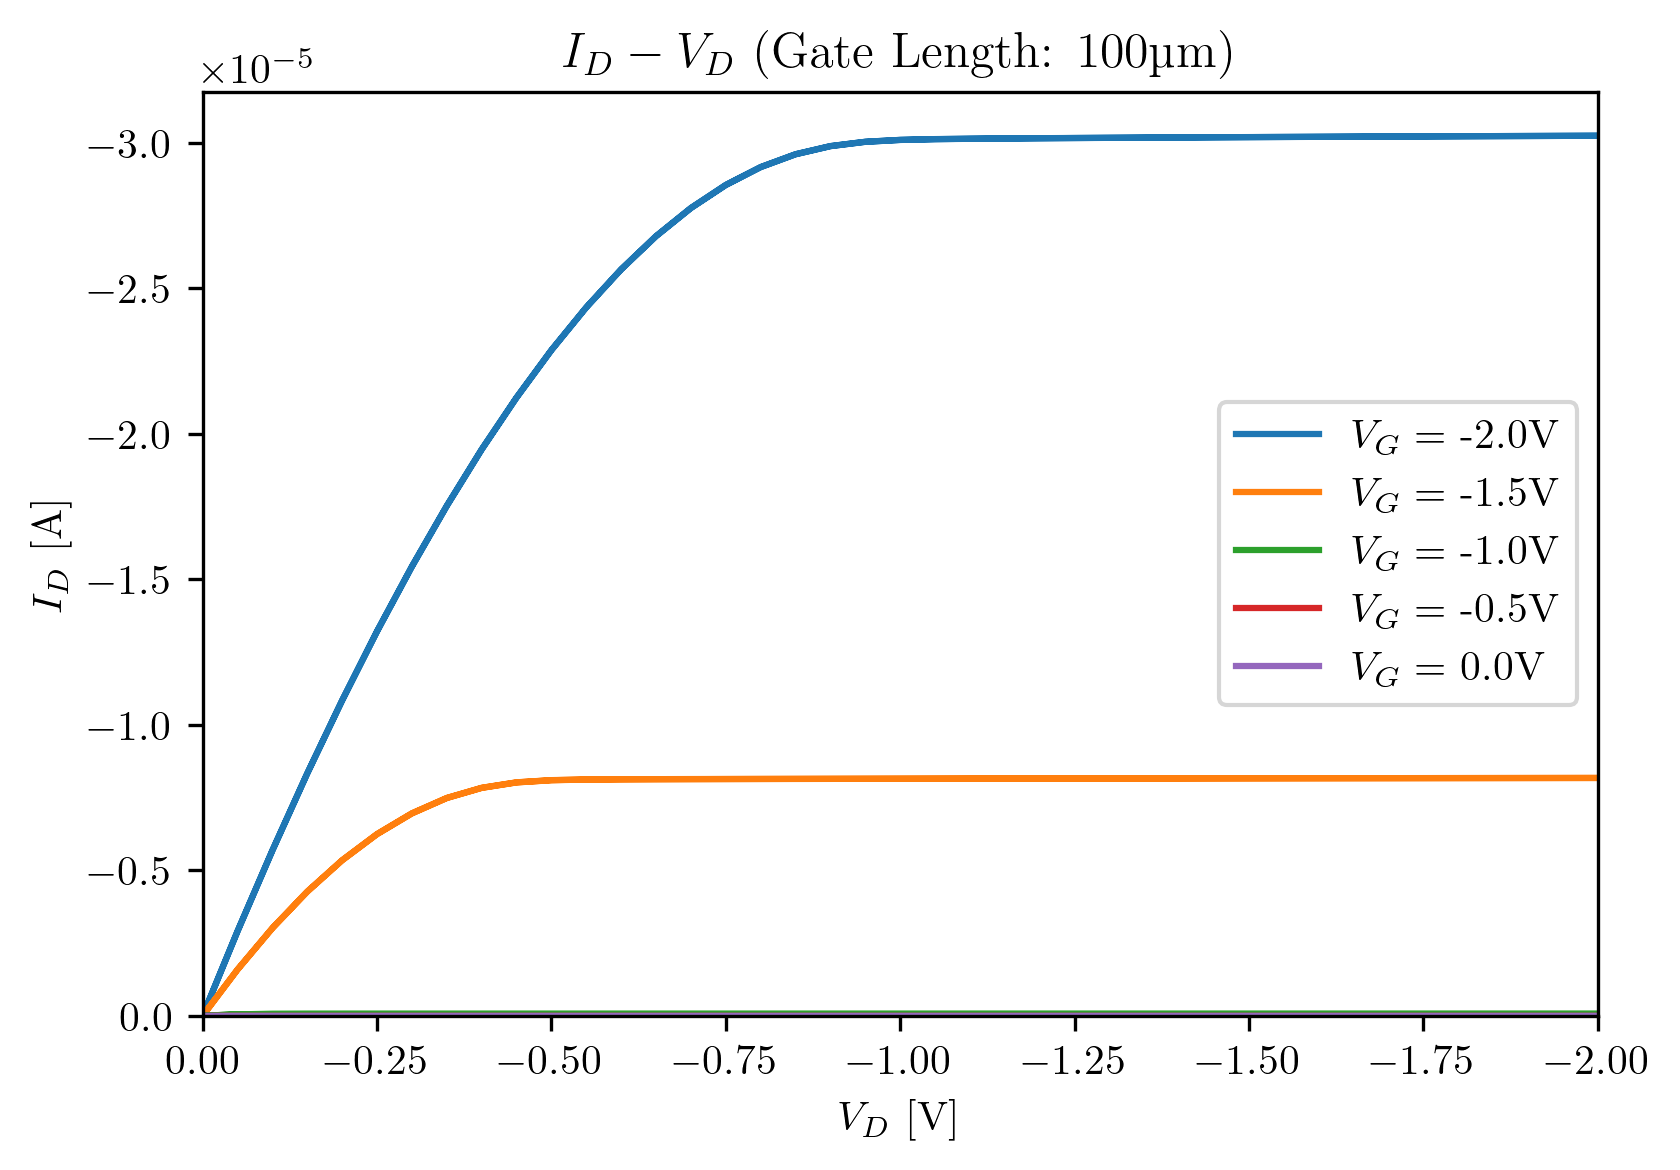

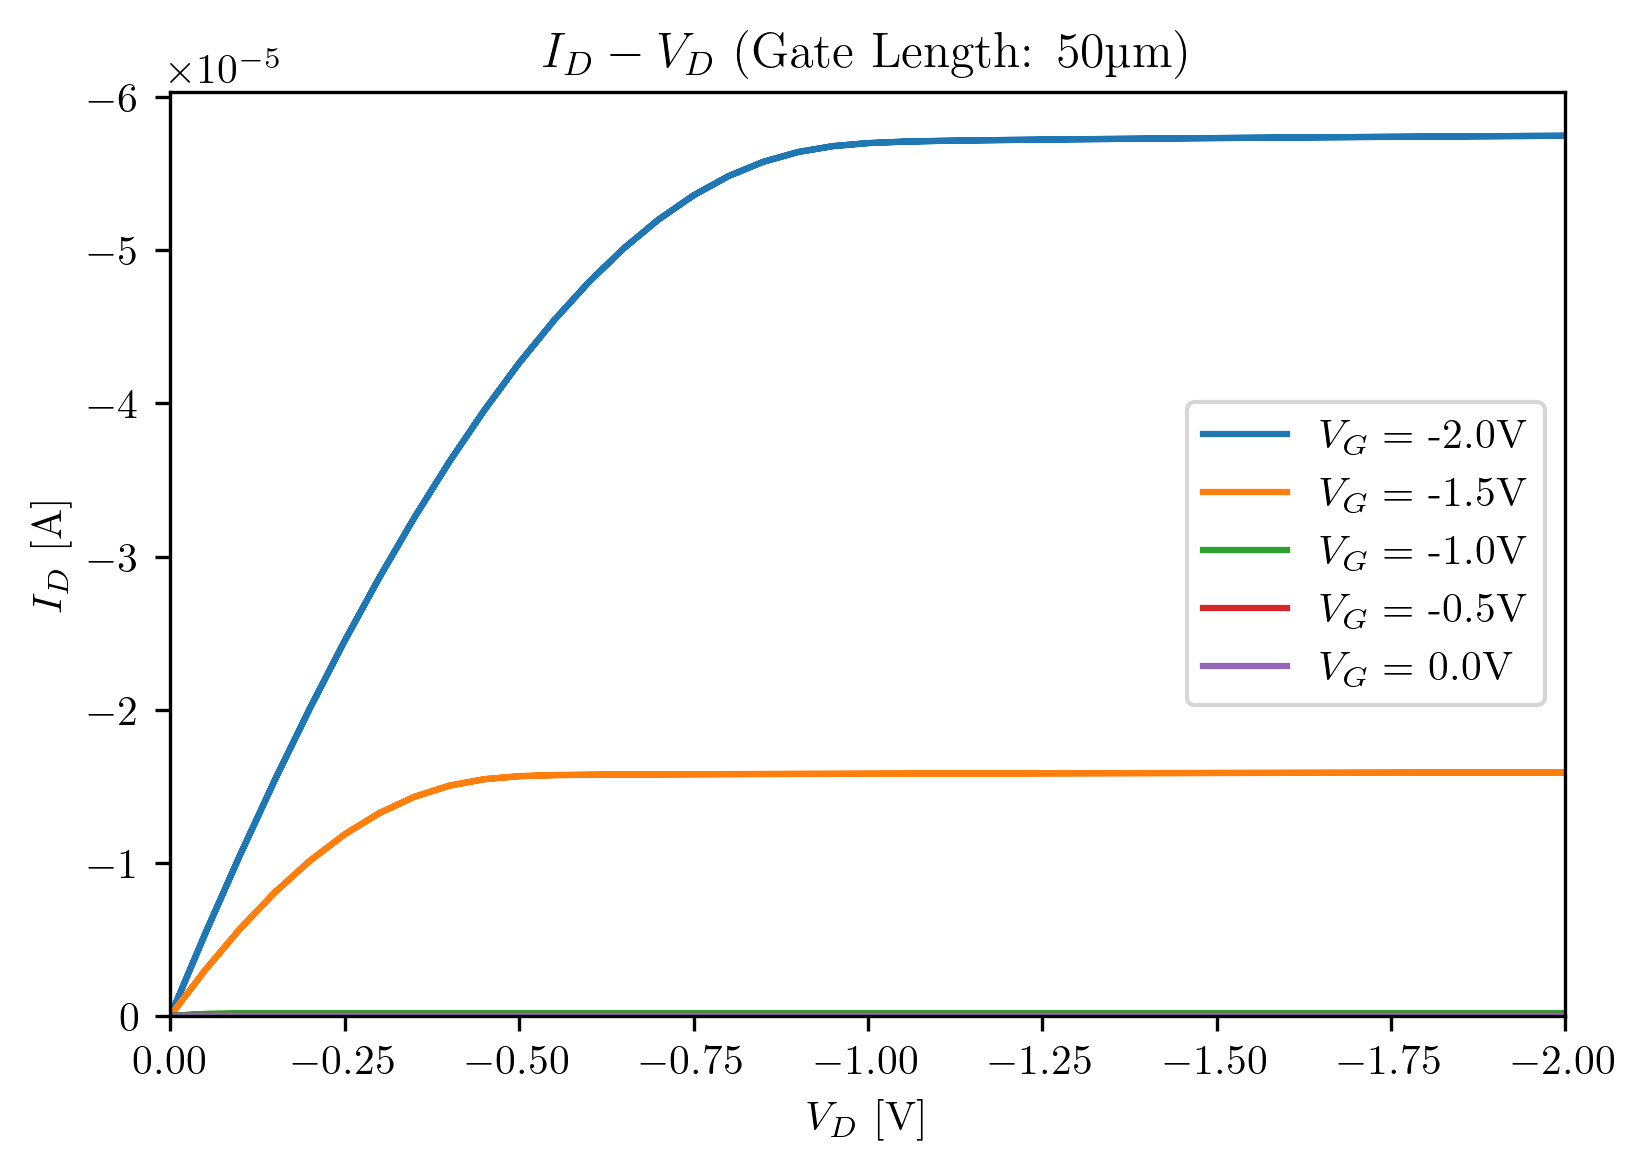

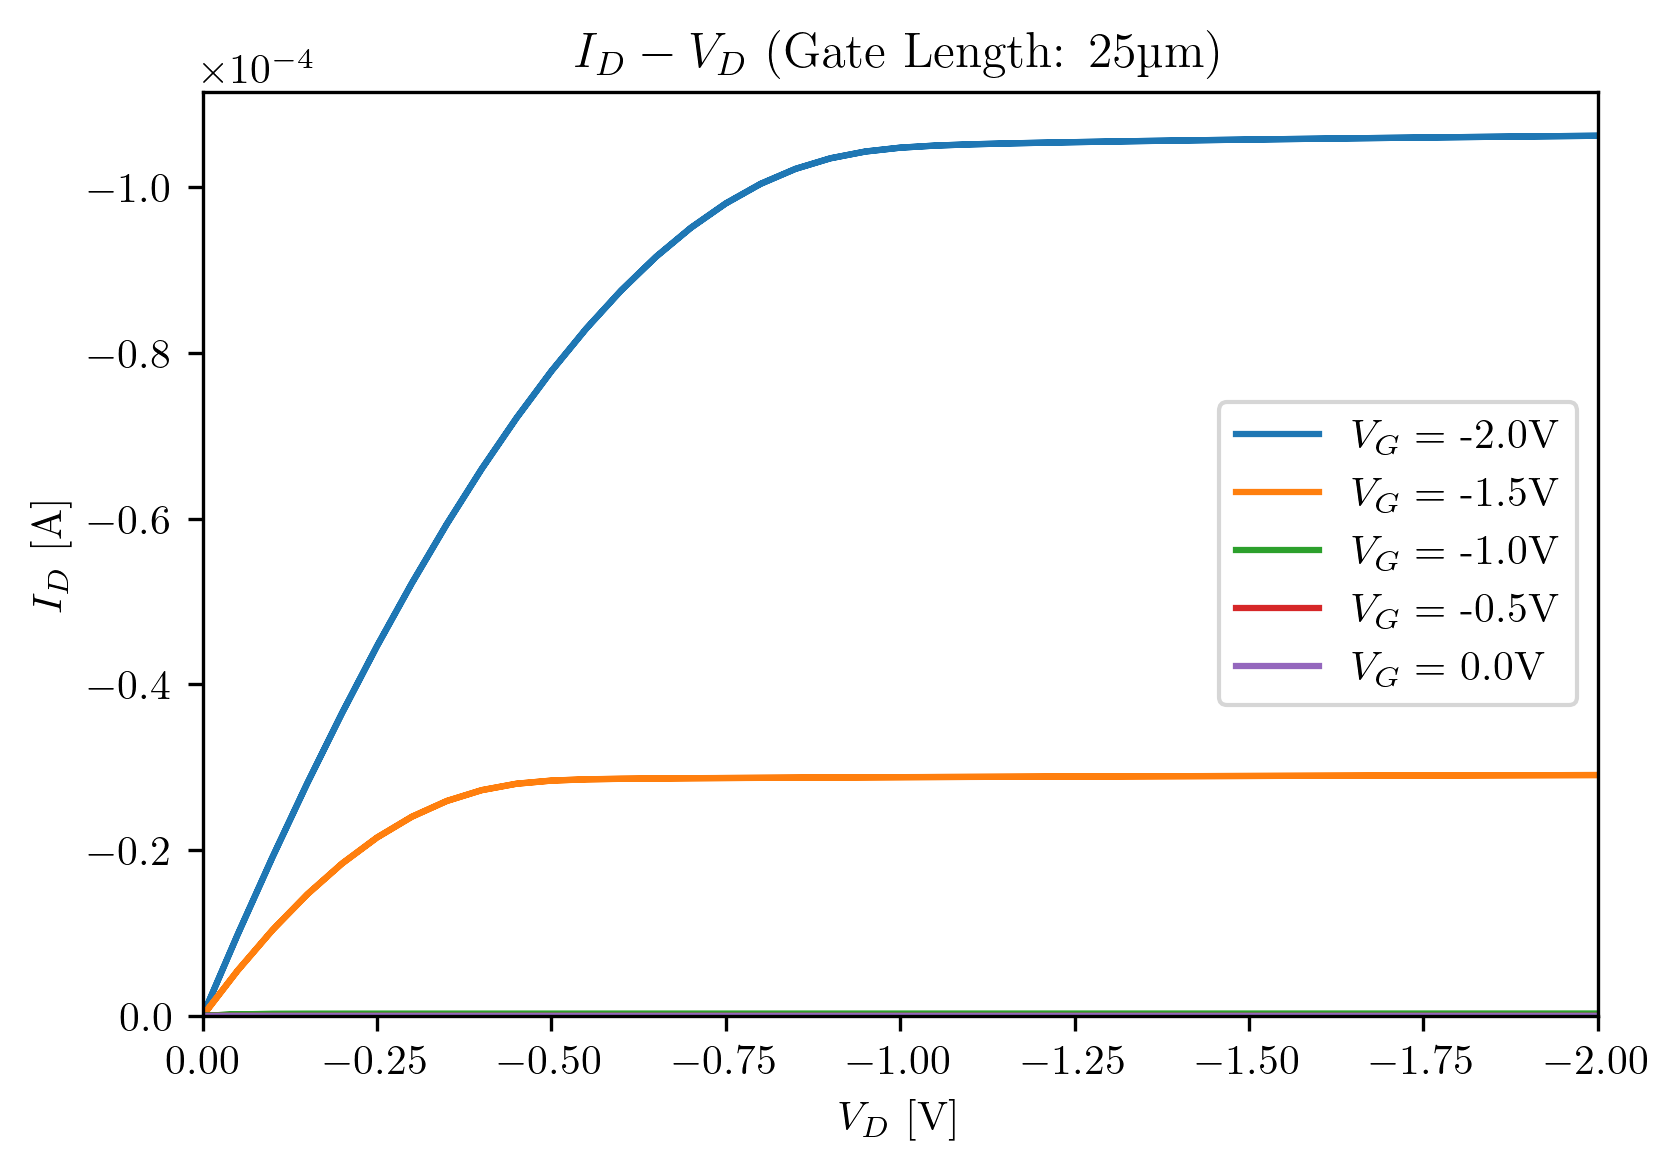

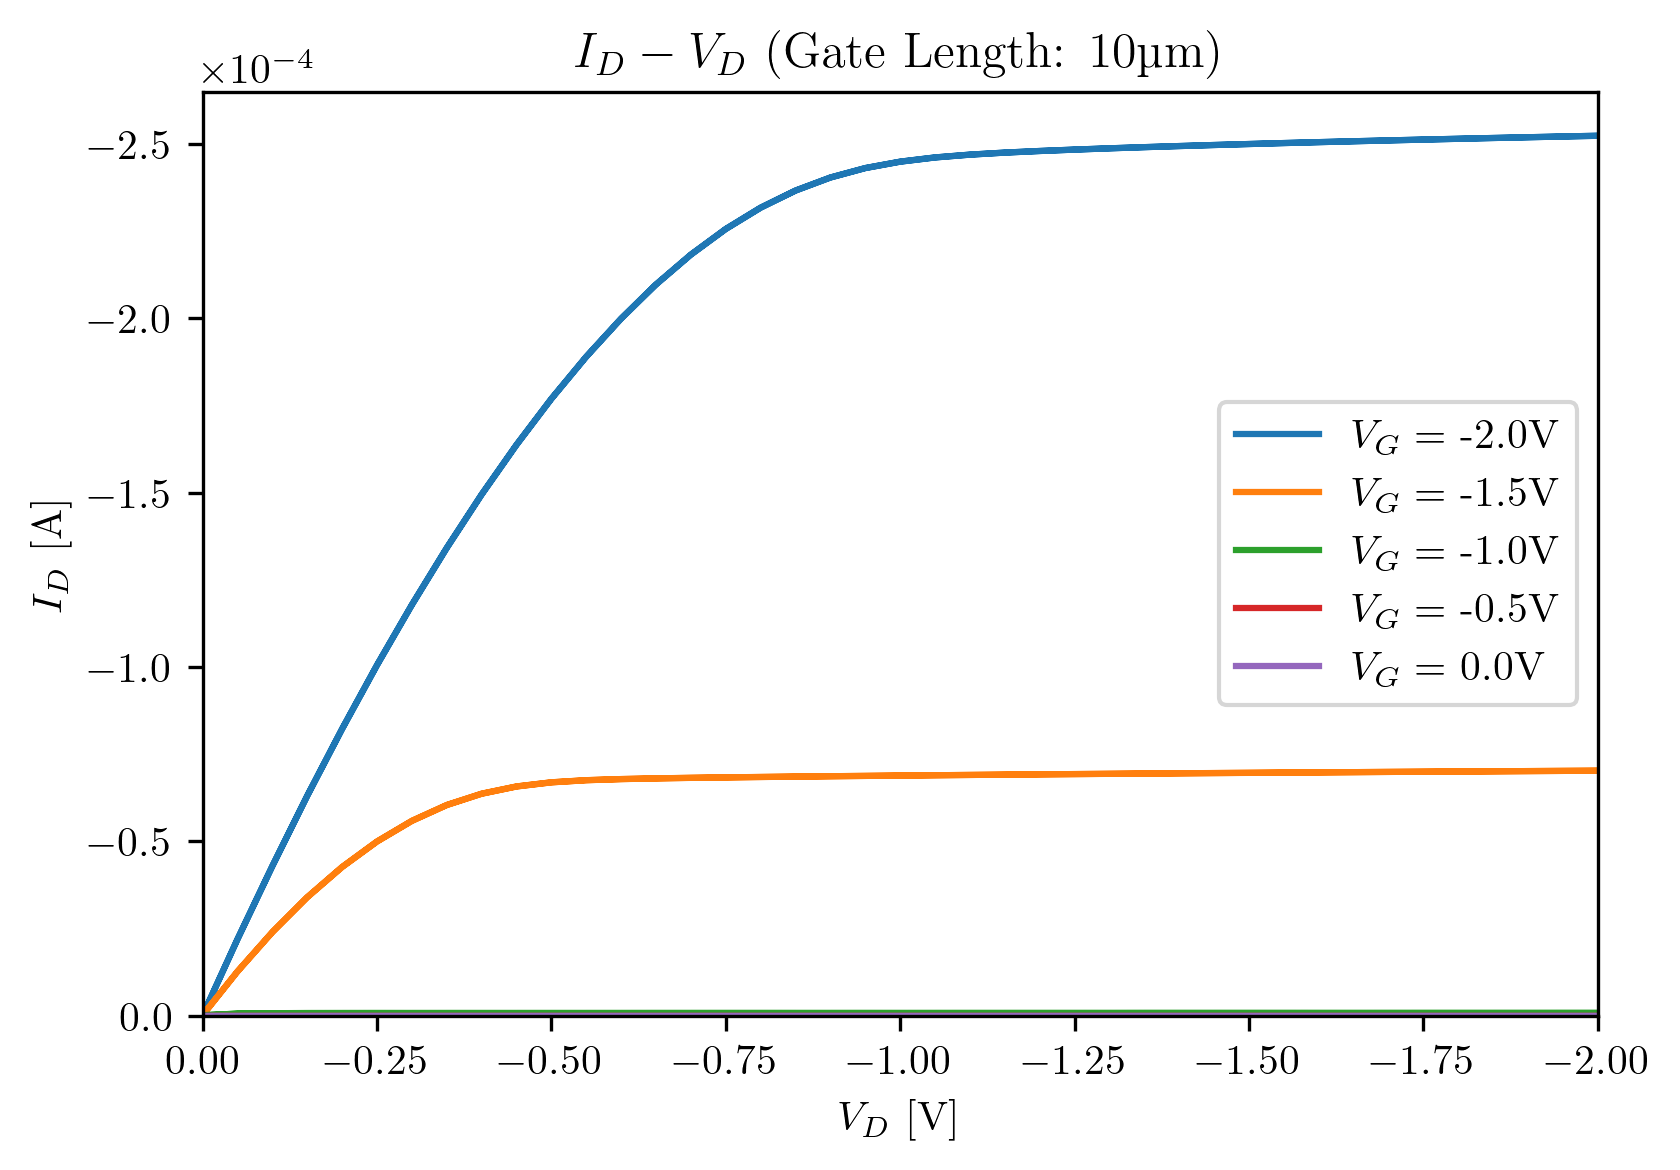

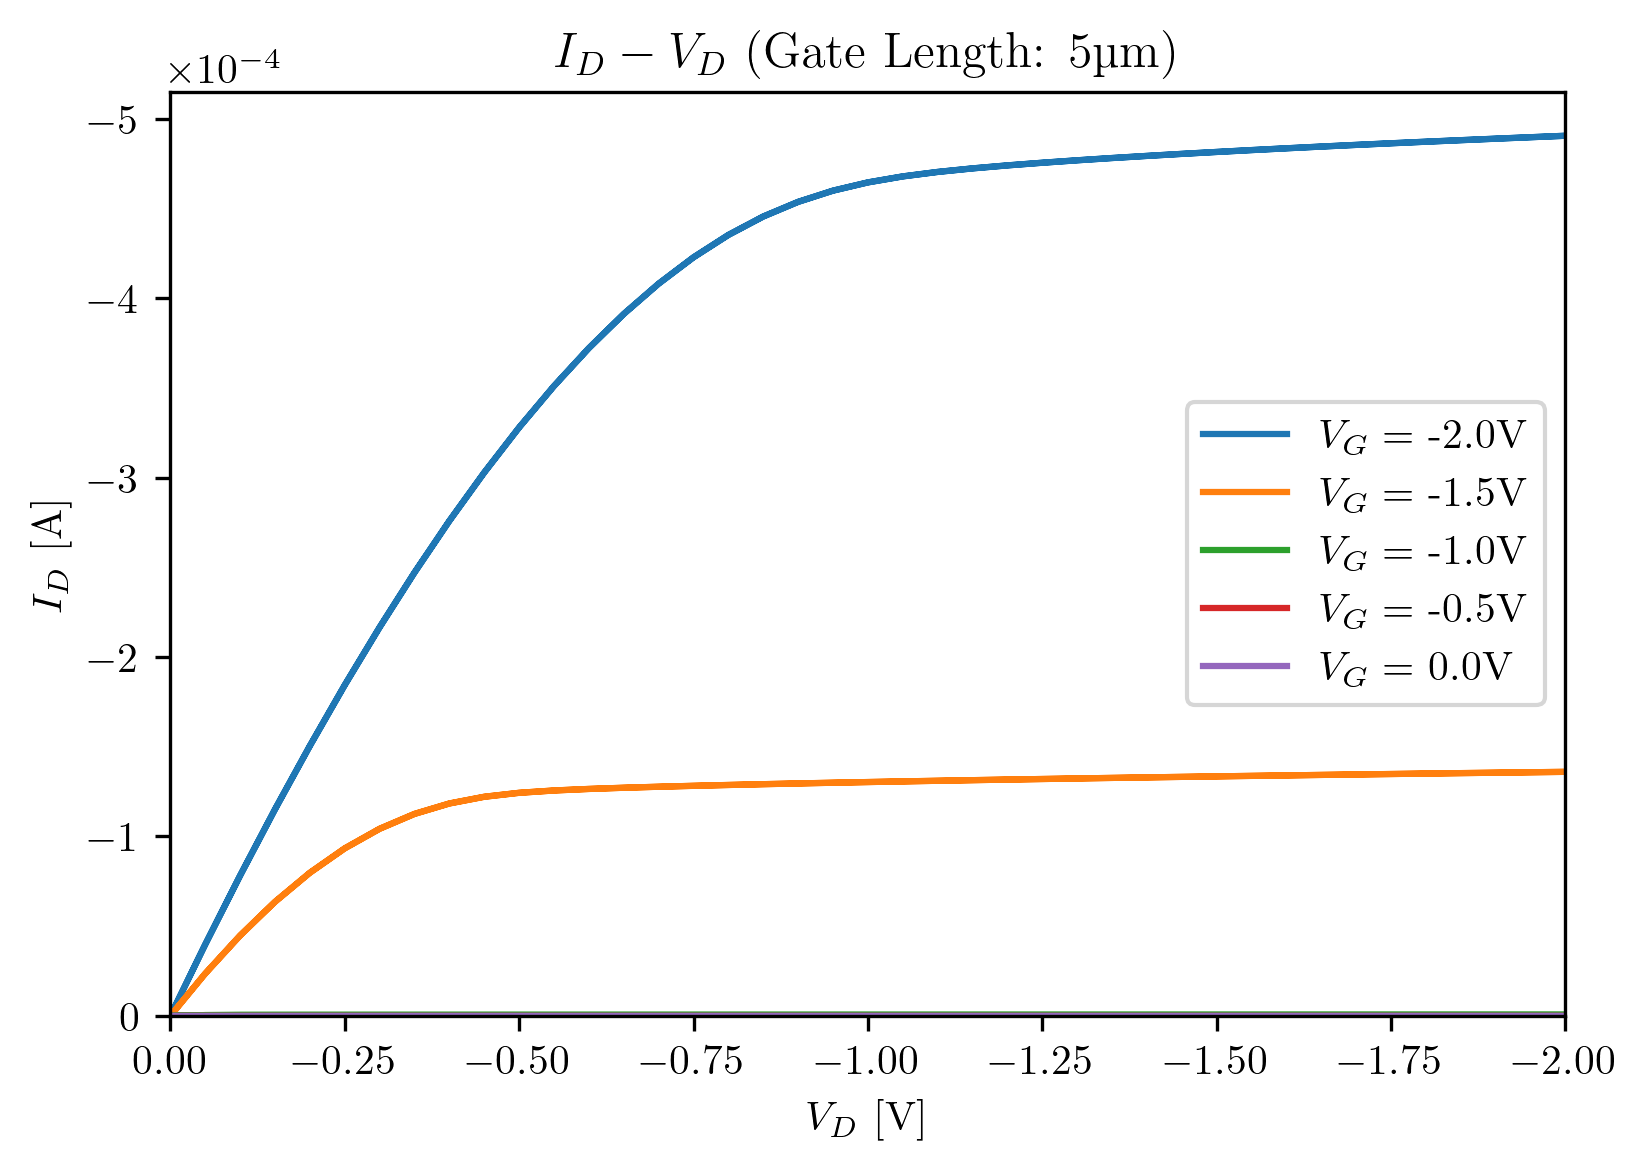

In [291]:
for i in range (0, len(idvd_list)):
    df = pd.read_csv('data/S'+str(filename_list[idvd_list[i]-1])+'.TXT',skiprows=[0,1,2,4], sep = " |\t",engine='python')

    fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
    graph(ax,df,"VDS","ID","VG")

    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.legend()

    ax.set_title(r"$I_D-V_D (Gate Length: 100\si{\micro\meter}$)")
    ax.set_title(r"$I_D-V_D \text{ (Gate Length: }" + str(length_list[idvd_list[i]-1]) +"\si{\micro\meter})$")
    ax.set_xlabel(r"$V_D $ [V]")
    ax.set_ylabel(r"$I_D $ [A]")
    ax.set_ylim(bottom=0)
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    ax.set_xlim(0,-2)
    plt.savefig("graphs/SiO2/Id_Vd/Id_Vd_"+str(length_list[idvd_list[i]-1])+"u.png")

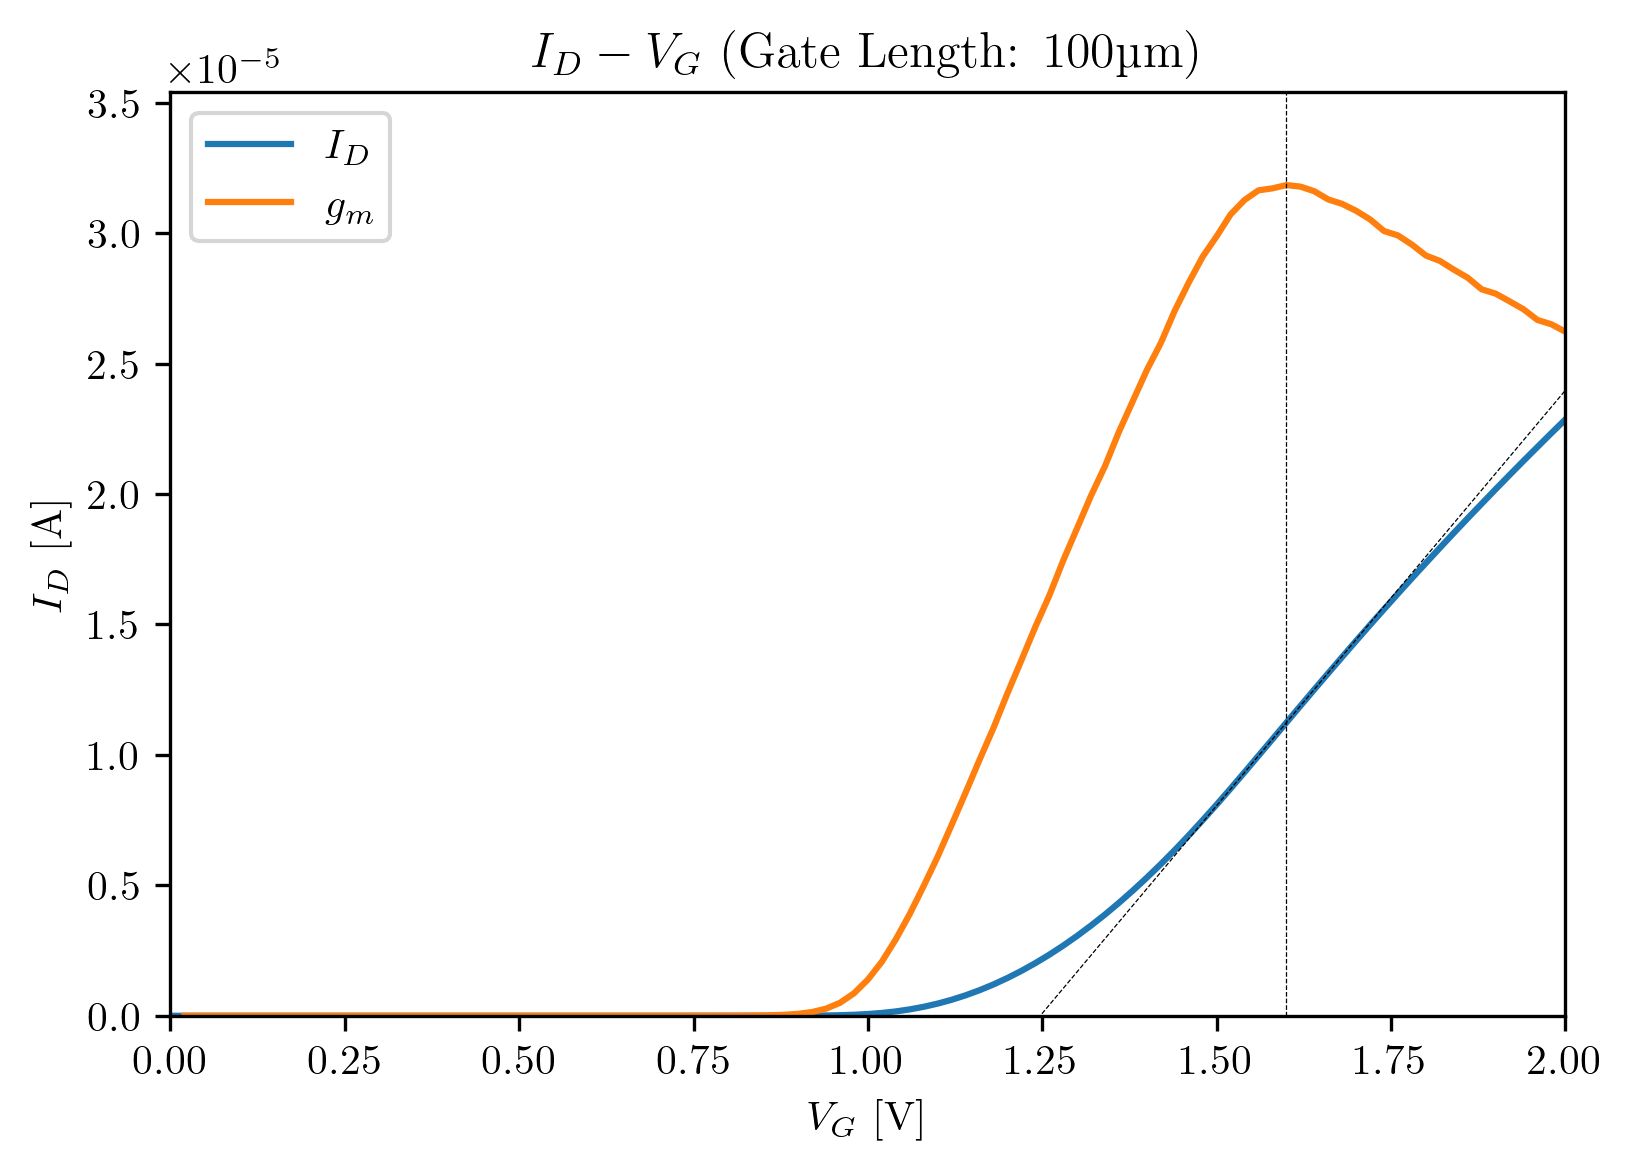

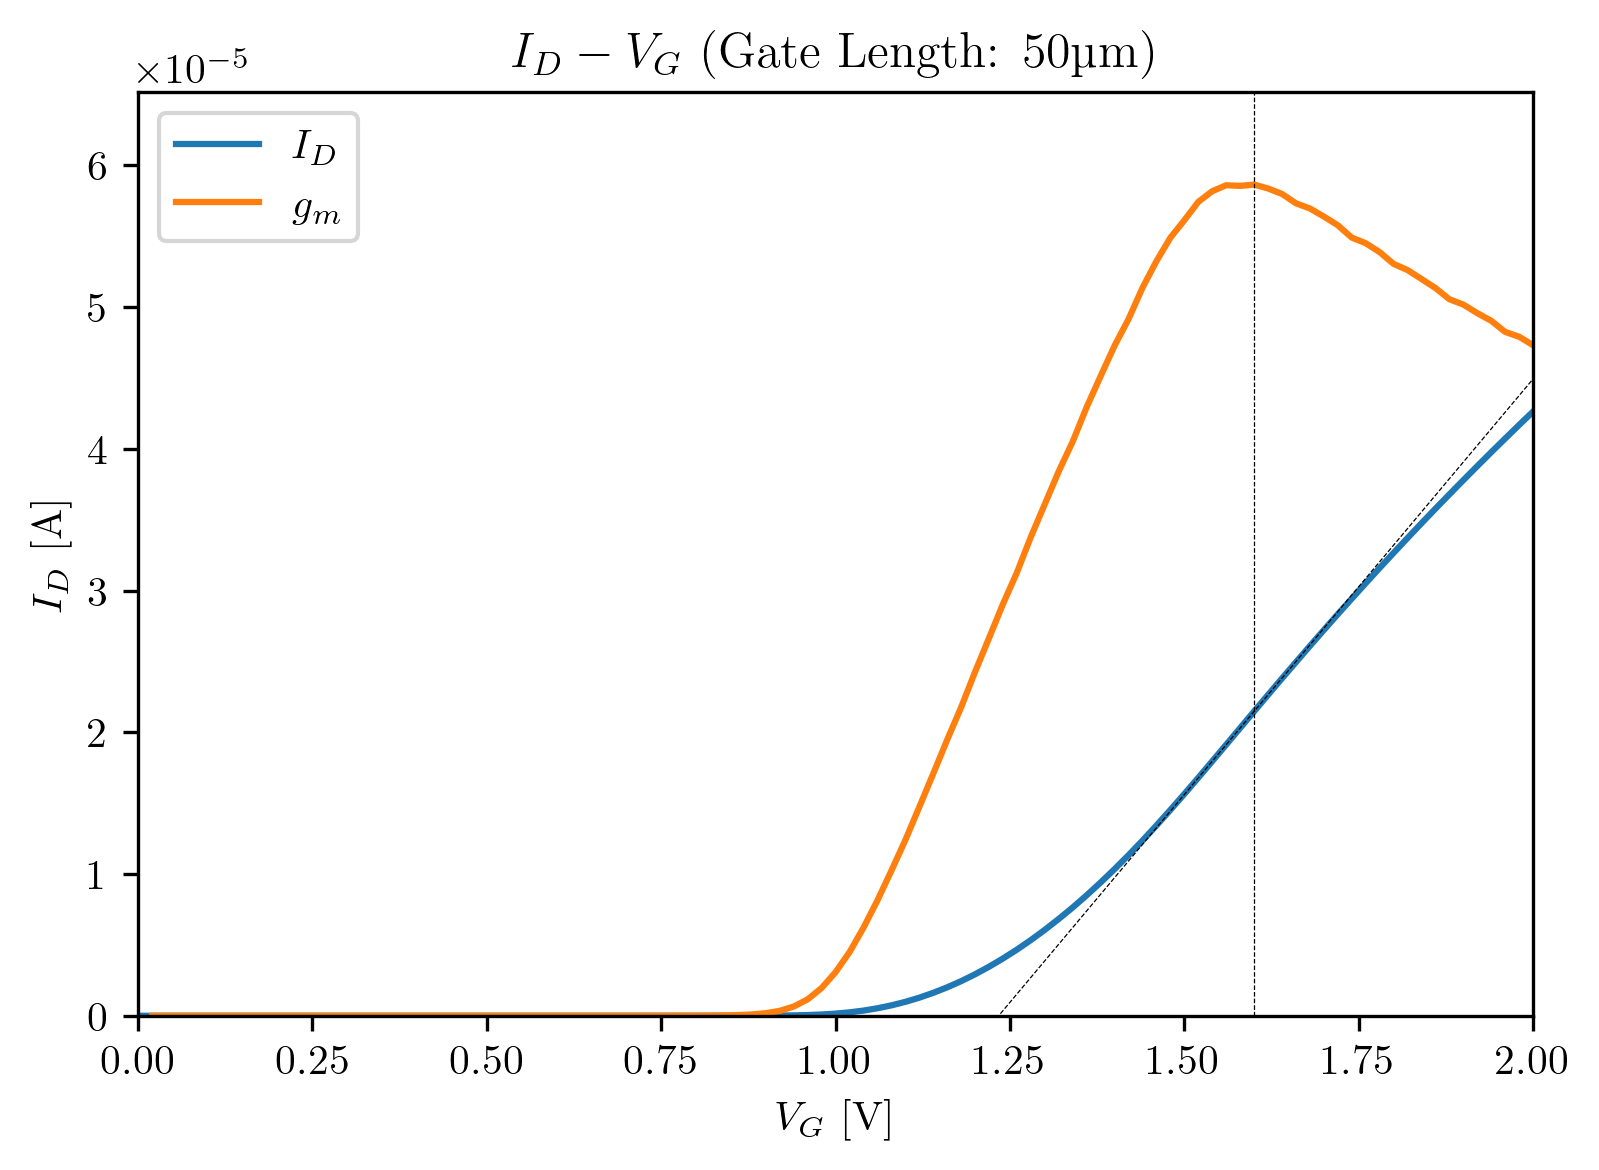

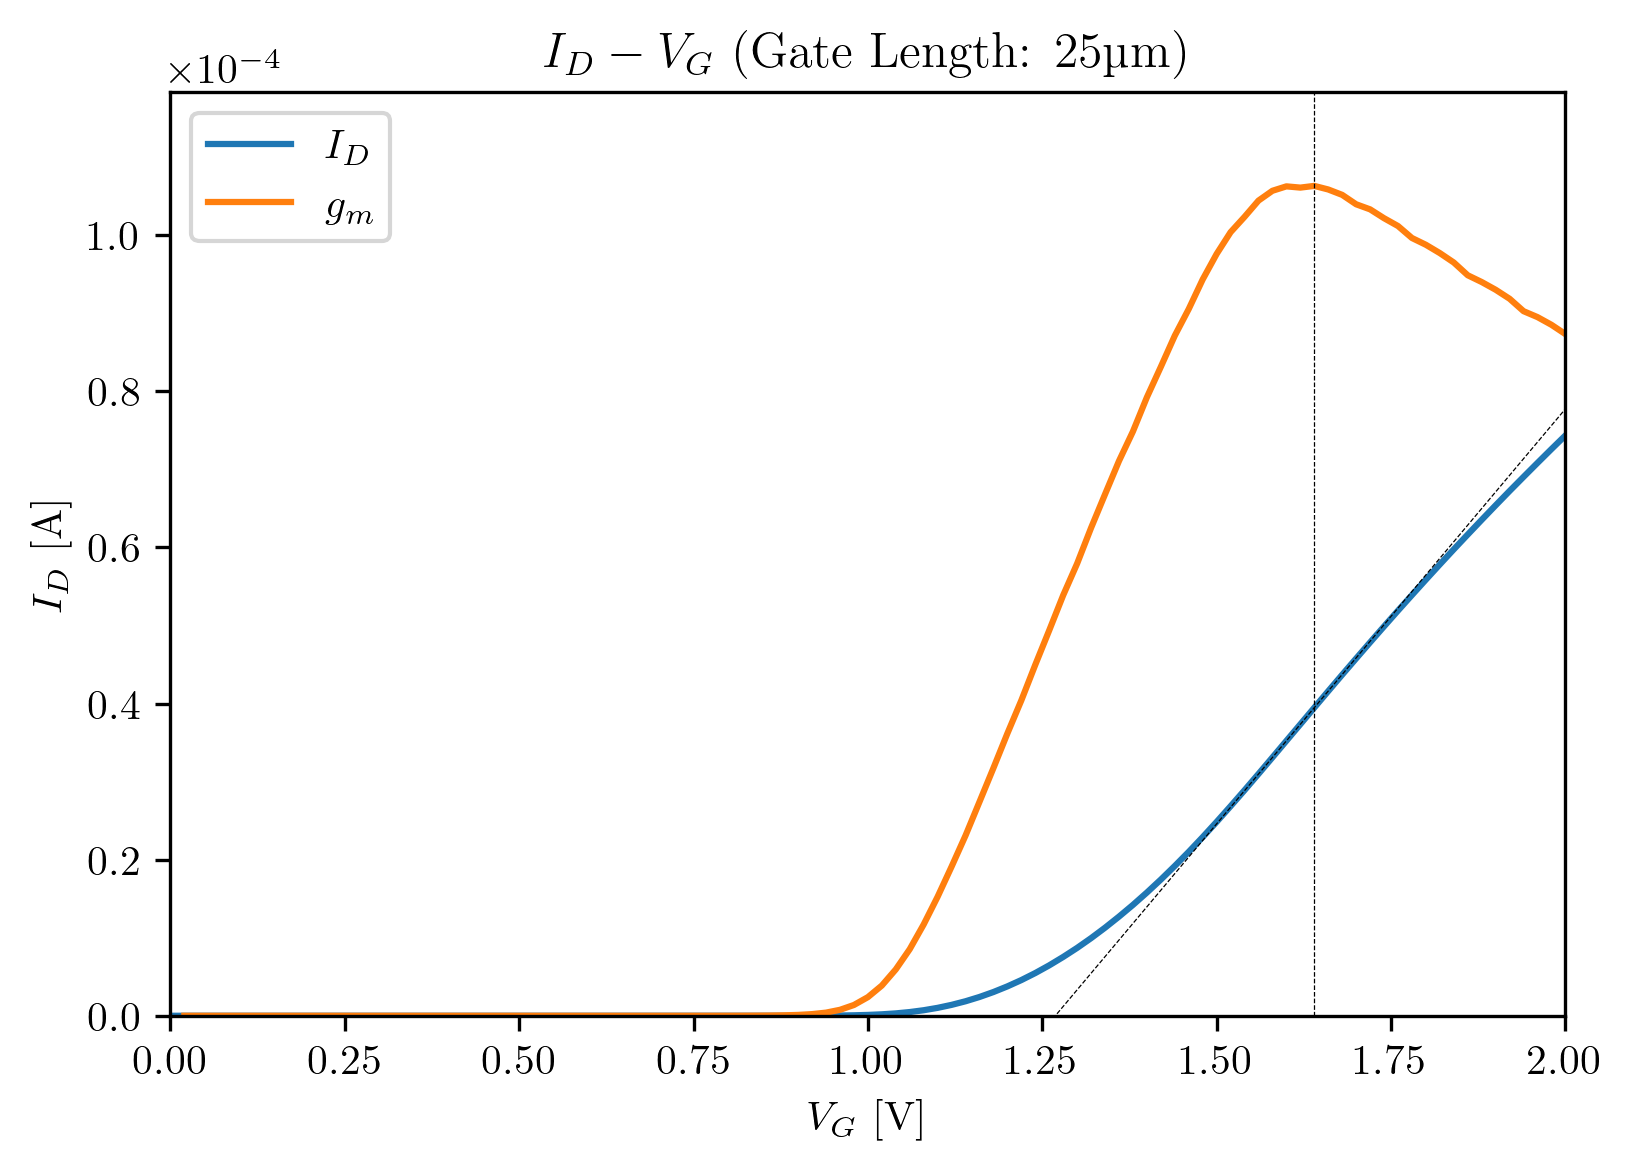

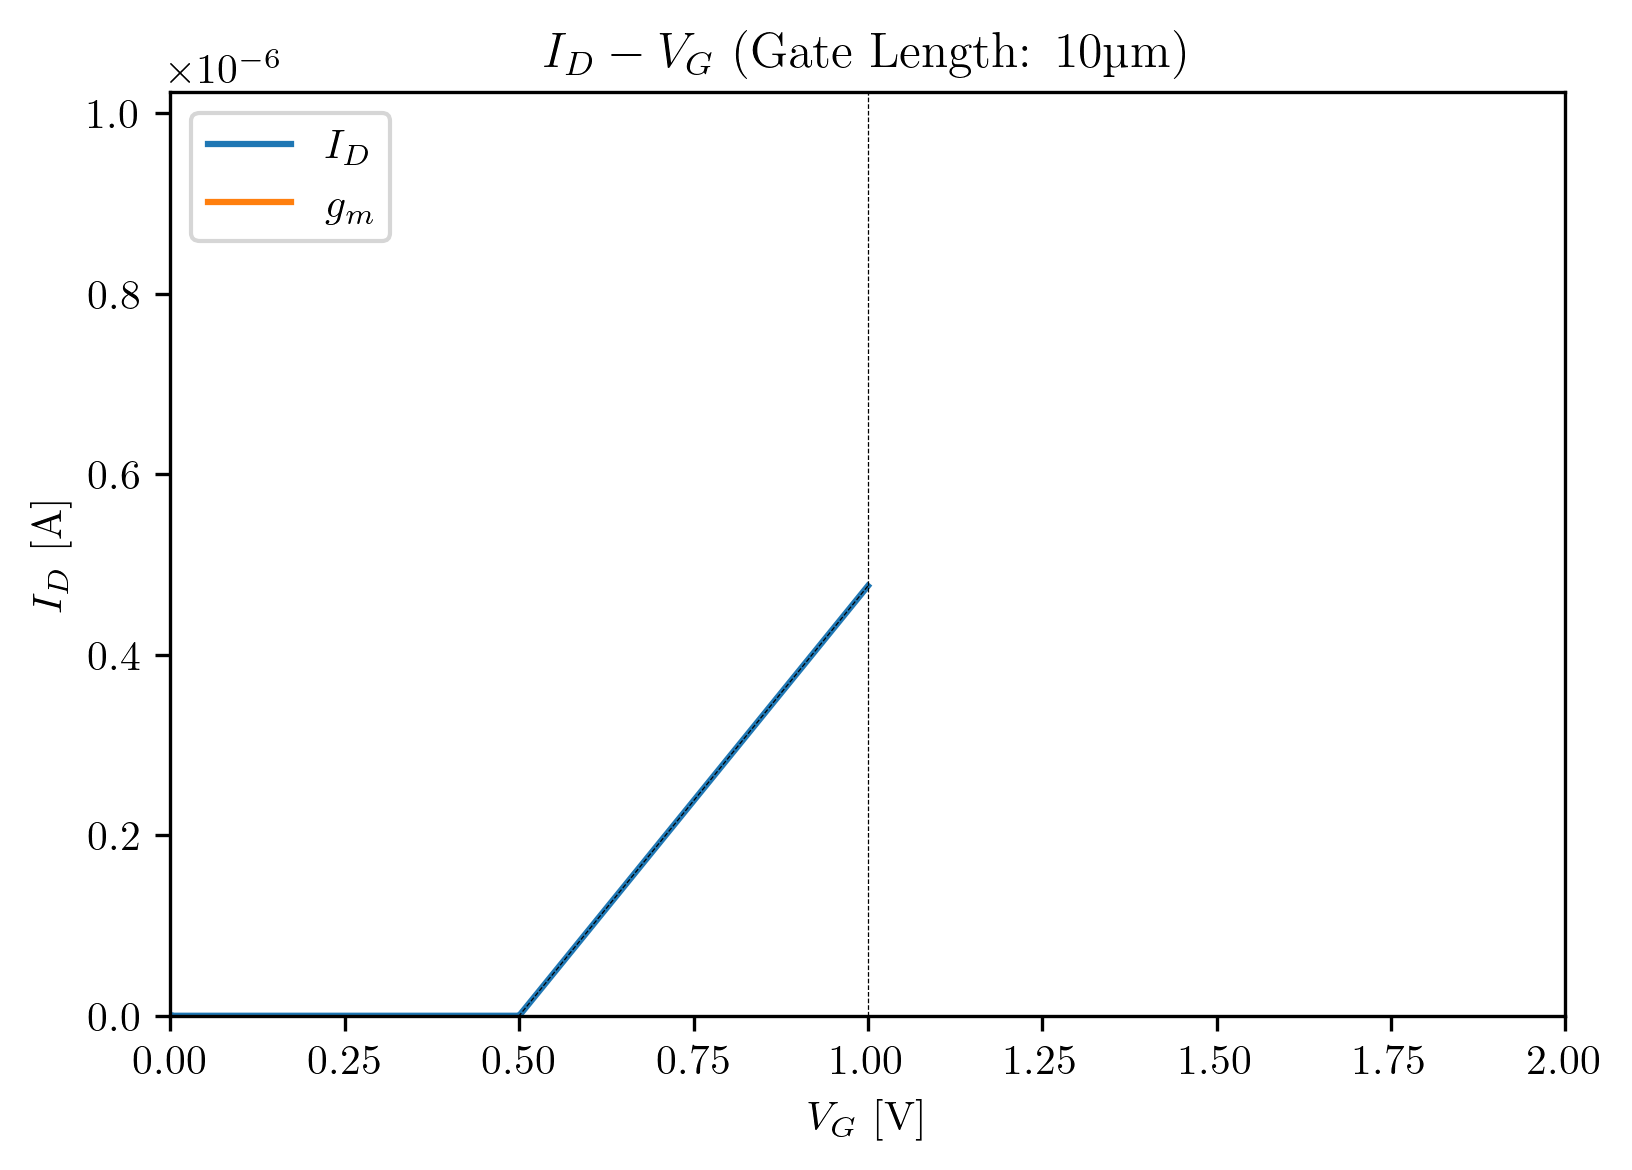

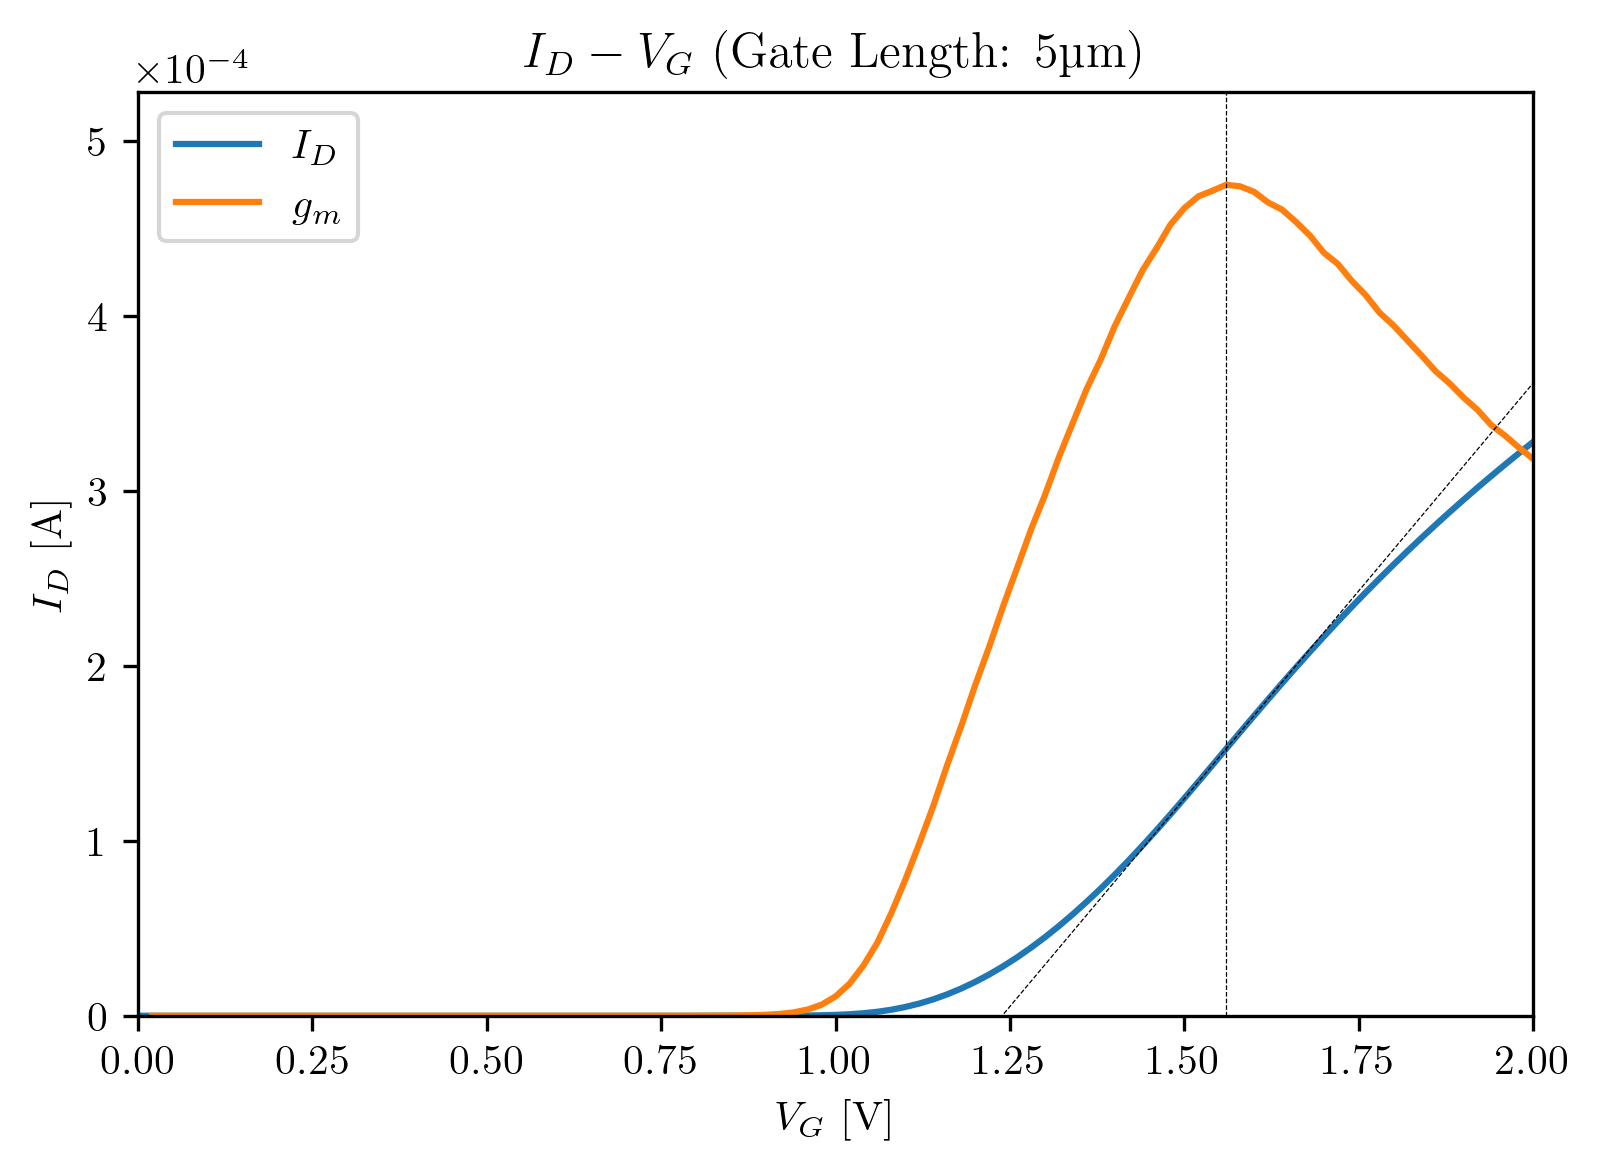

In [293]:
for i in range (0, len(idvg_list)):
    df = pd.read_csv('data/S'+str(filename_list[idvg_list[i]-1])+'.TXT',skiprows=[0,1,2,4], sep = " |\t",engine='python')

    #negative -> positive
    df['ID'] = df['ID'].abs()
    df['VG'] = df['VG'].abs()
    df['VDS'] = df['VDS'].abs()

    #cut data
    df = df.loc[df['VDS'] == 0.5]
    df = df[:int(len(df)/2)]
    df.reset_index(inplace=True)

    #derivative
    df['dID'] = df['ID'].diff()
    df['dVG'] = df['VG'].diff()
    df['gm'] = df['dID']/df['dVG']

    #tangent line
    df['VDS_tan'] = df['gm'].max() * (df['VG'] - df['VG'][df['gm'].idxmax()]) + df['ID'][df['gm'].idxmax()]

    #graph
    fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

    ax.plot(df["VG"],df["ID"], label=r"$I_D$")
    ax.plot(df["VG"],df["gm"], label=r"$g_m$")
    ax.plot(df["VG"],df["VDS_tan"],linestyle='dashed',color='black',linewidth=0.3)
    ax.axvline(x=df['VG'][df['gm'].idxmax()], ymin=0.0, ymax = 1.0, ls='dashed', c='Black', linewidth=0.3)

    #style
    ax.set_xlim(0.0,2.0)
    ax.set_ylim(bottom=0)

    ax.legend(loc='upper left')

    ax.set_title(r"$I_D-V_G \text{ (Gate Length: } " + str(length_list[idvg_list[i]-1]) +"\si{\micro\meter})$")
    ax.set_xlabel(r"$V_G $ [V]")
    ax.set_ylabel(r"$I_D$ [A]")
    
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    plt.savefig("graphs/SiO2/Id_Vg/Vd500m/Id_Vg_"+str(length_list[idvg_list[i]-1])+"u_Vd500m.png")

Vt = 1.04
Vt = 1.02
Vt = 1.06
Vt = 1.06


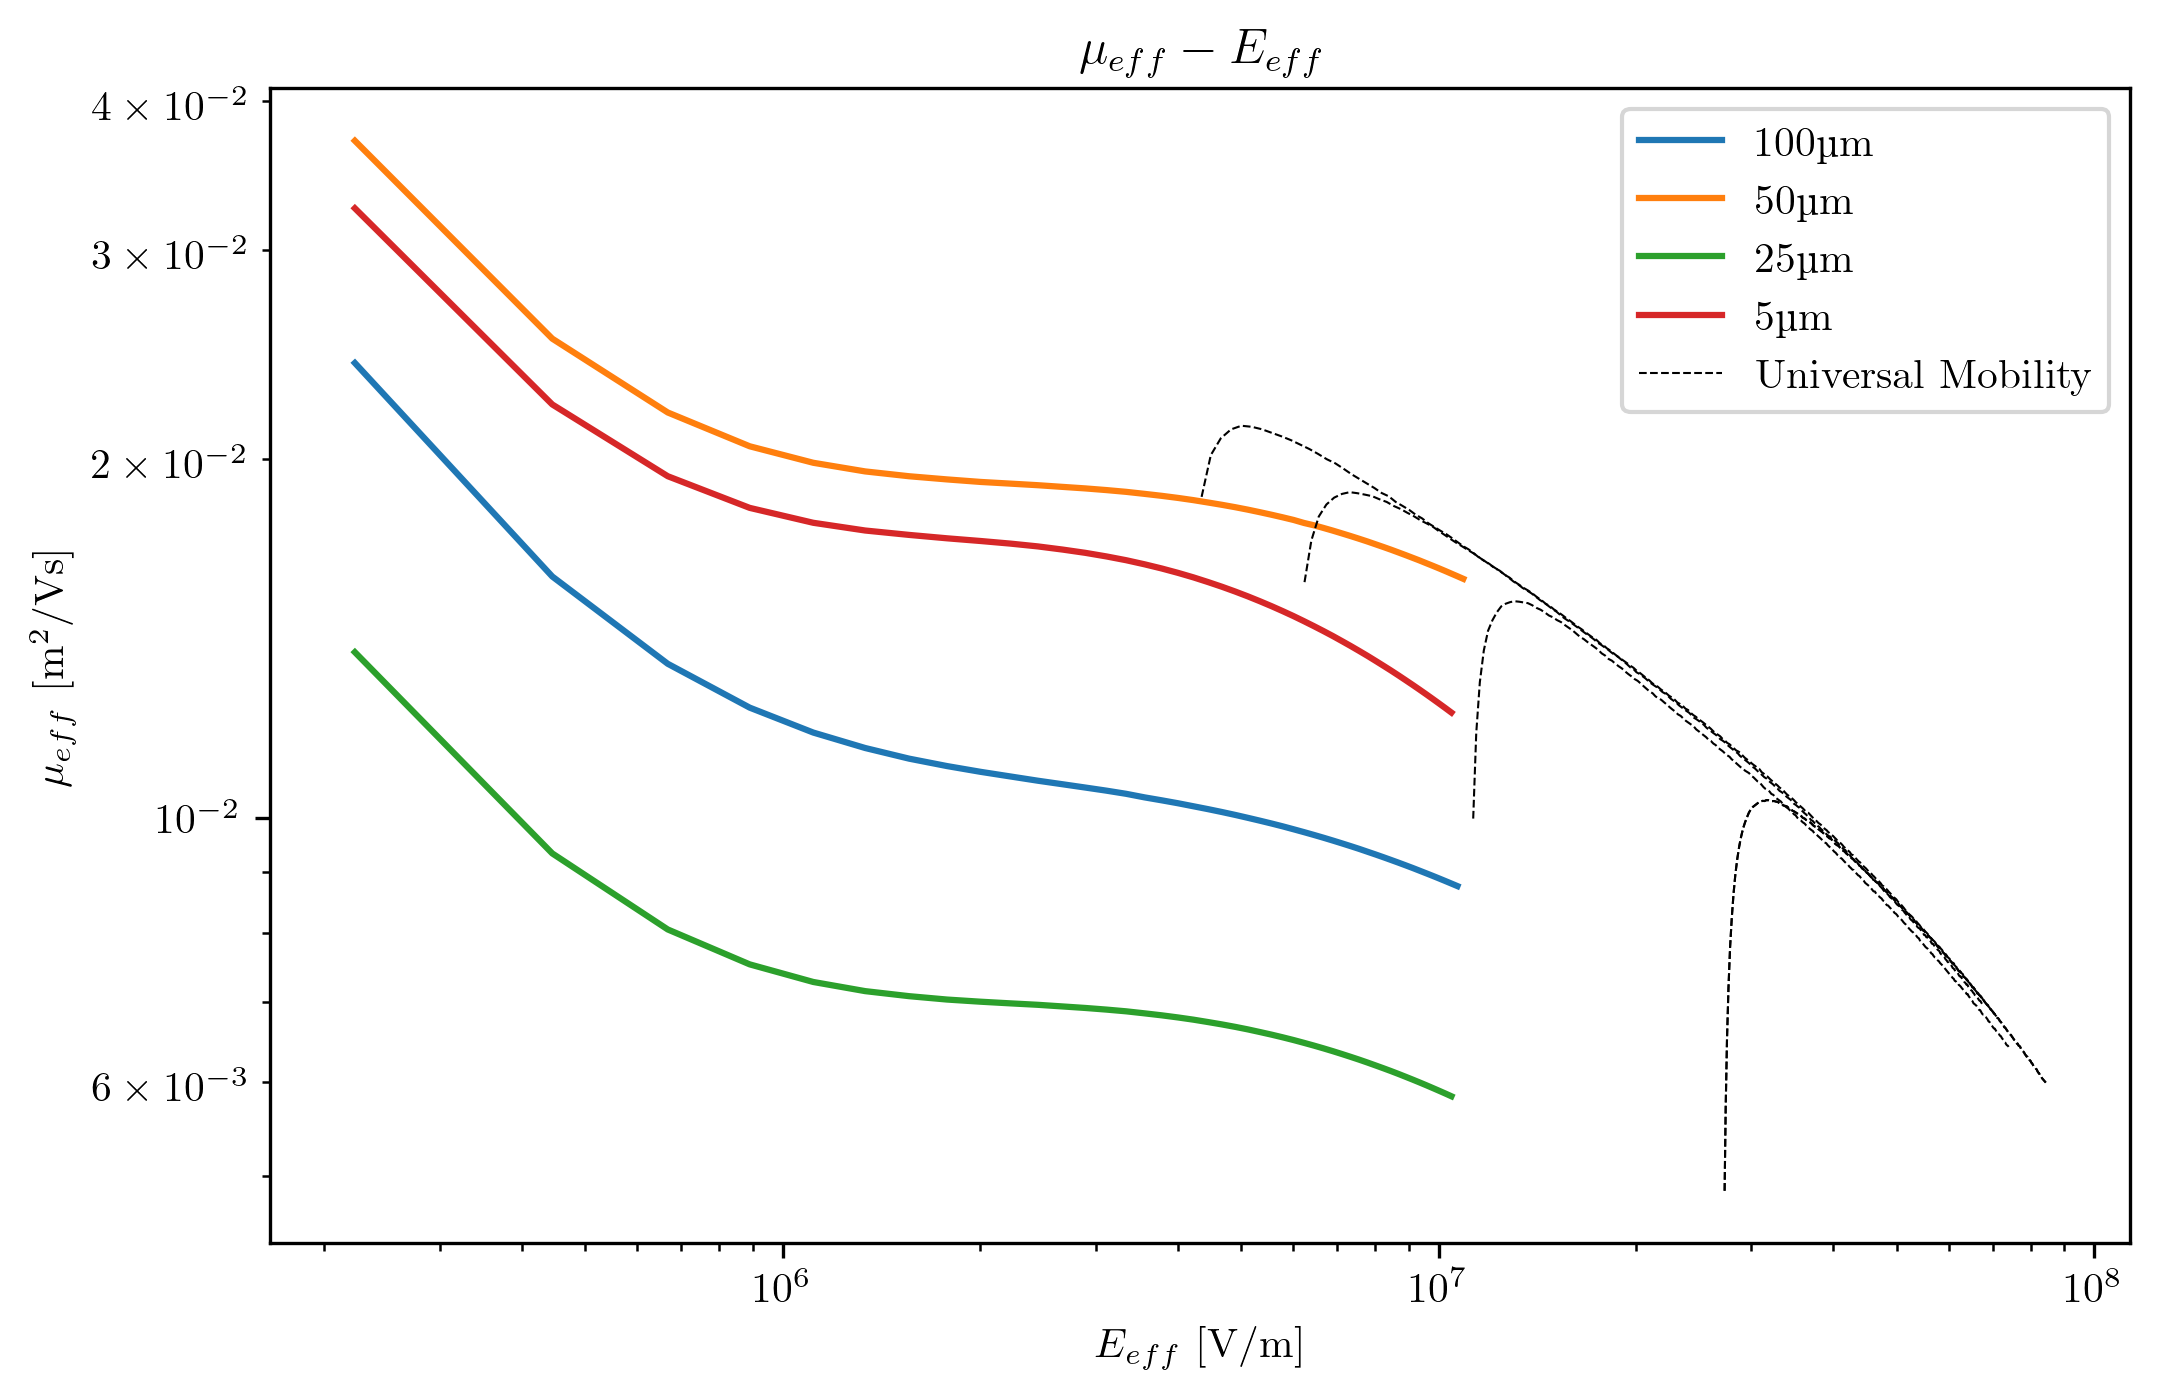

In [297]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
epsilon_si = 11.68*8.854e-12
Cox = 3.9*8.854e-12/10e-9
idvg_list = [2,3,6,9]

for i in range (0, len(idvg_list)):

    df = pd.read_csv('data/S'+str(filename_list[idvg_list[i]-1])+'.TXT',skiprows=[0,1,2,4], sep = " |\t",engine='python')

    W = 100e-6
    L = length_list[idvg_list[i]]*10**-6

    #negative -> positive
    df['ID'] = df['ID'].abs()
    df['VG'] = df['VG'].abs()
    df['VDS'] = df['VDS'].abs()

    #cut data
    df = df.loc[df['VDS'] == 0.05]
    df = df[:int(len(df)/2)]
    df.reset_index(inplace=True)

    #derivative
    df['dID'] = df['ID'].diff()
    df['dVG'] = df['VG'].diff()
    df['gm'] = df['dID']/df['dVG']

    #tangent line
    df['VDS_tan'] = df['gm'].max() * (df['VG'] - df['VG'][df['gm'].idxmax()]) + df['ID'][df['gm'].idxmax()]

    #Get Vt
    for j in range (0, len(df)):
        if(df['VDS_tan'][j] > 0.0):
            print ("Vt =",df['VG'][j])
            Vt = df['VG'][j]
            break

    df['mu_eff'] = (L/W)*(1/(Cox*(df['VG']-Vt)))*(df['ID']/df['VDS'])

    eta = 1/3
    df['E_eff'] = ((eta*Cox)/epsilon_si)*(df['VG']-Vt)
    
    ax.plot(df['E_eff'],df['mu_eff'],label=str(length_list[idvg_list[i]-1])+r"\si{\micro\meter}")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$E_{eff}$ [V/m]")
ax.set_ylabel(r"$\mu_{eff}$ [m$^2$/Vs]")
ax.set_title(r"$\mu_{eff}-E_{eff}$")

sheets = ['2e16','8e15','5e16','3e17','7e17']

for i in range (0, len(sheets)-1):
    df_unmob = pd.read_excel('universal_mob/pMOSFET/universal_mobility.xlsx',sheet_name=sheets[i],skiprows=[0,1,3], names=['ns','eeff','mob'])
    ax.plot(df_unmob['eeff'],df_unmob['mob'],c="black",linewidth=0.5,linestyle="dashed")
i += 1
ax.plot(df_unmob['eeff'],df_unmob['mob'],c="black",linewidth=0.5,linestyle="dashed",label="Universal Mobility")

ax.legend()

plt.savefig("graphs/SiO2/mobility_Vd50m.png")


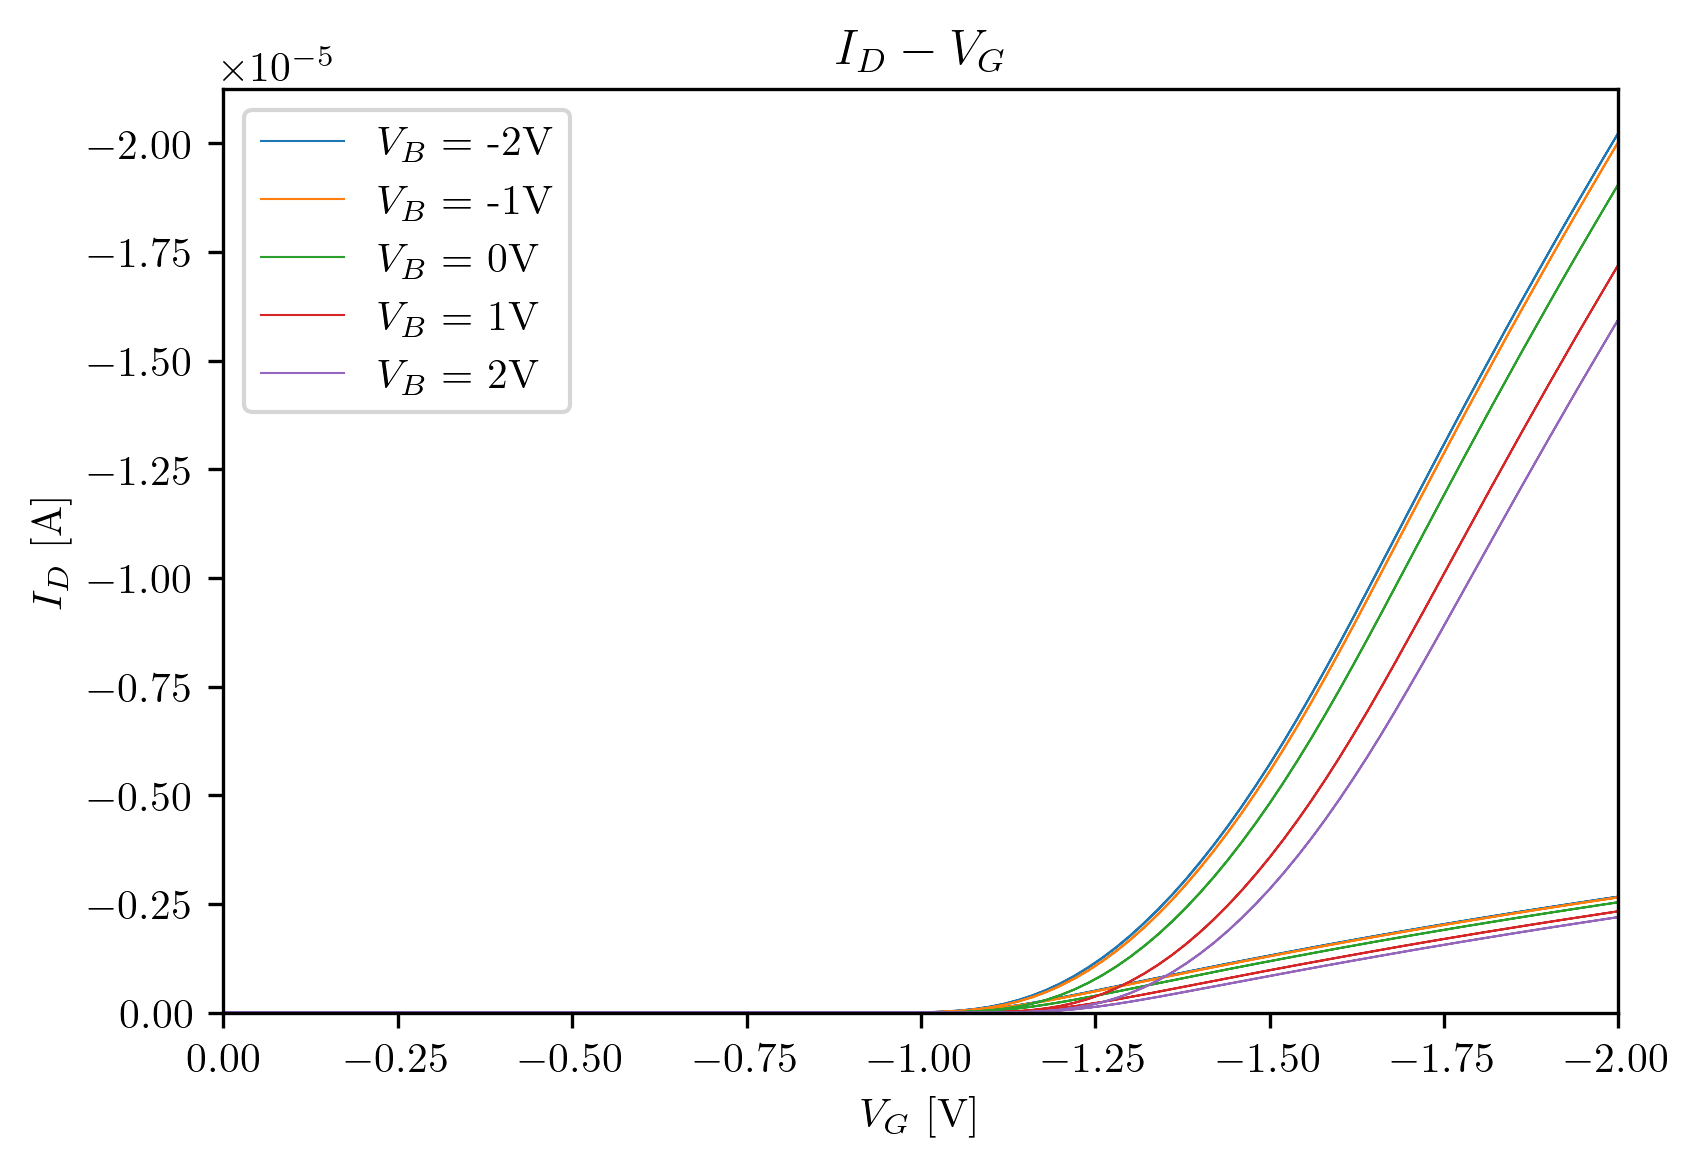

In [325]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
vbs = [-2,-1,0,1,2]
for i in range (0,5):
    df = pd.read_csv('data/S'+str(i+11)+'.TXT',skiprows=[0,1,2,4], sep = " |\t",engine='python')

    plt.plot(df["VG"],df["ID"],linewidth=0.5,label=r"$V_B=$ "+str(vbs[i])+"V")

    ax.invert_xaxis()
    ax.invert_yaxis()

ax.legend()

ax.set_title(r"$I_D-V_G$")
ax.set_xlabel(r"$V_G $ [V]")
ax.set_ylabel(r"$I_D $ [A]")
ax.set_ylim(bottom=0)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set_xlim(0,-2)
plt.savefig("graphs/SiO2/Vb/Id_Vg_Vb_100u.png")

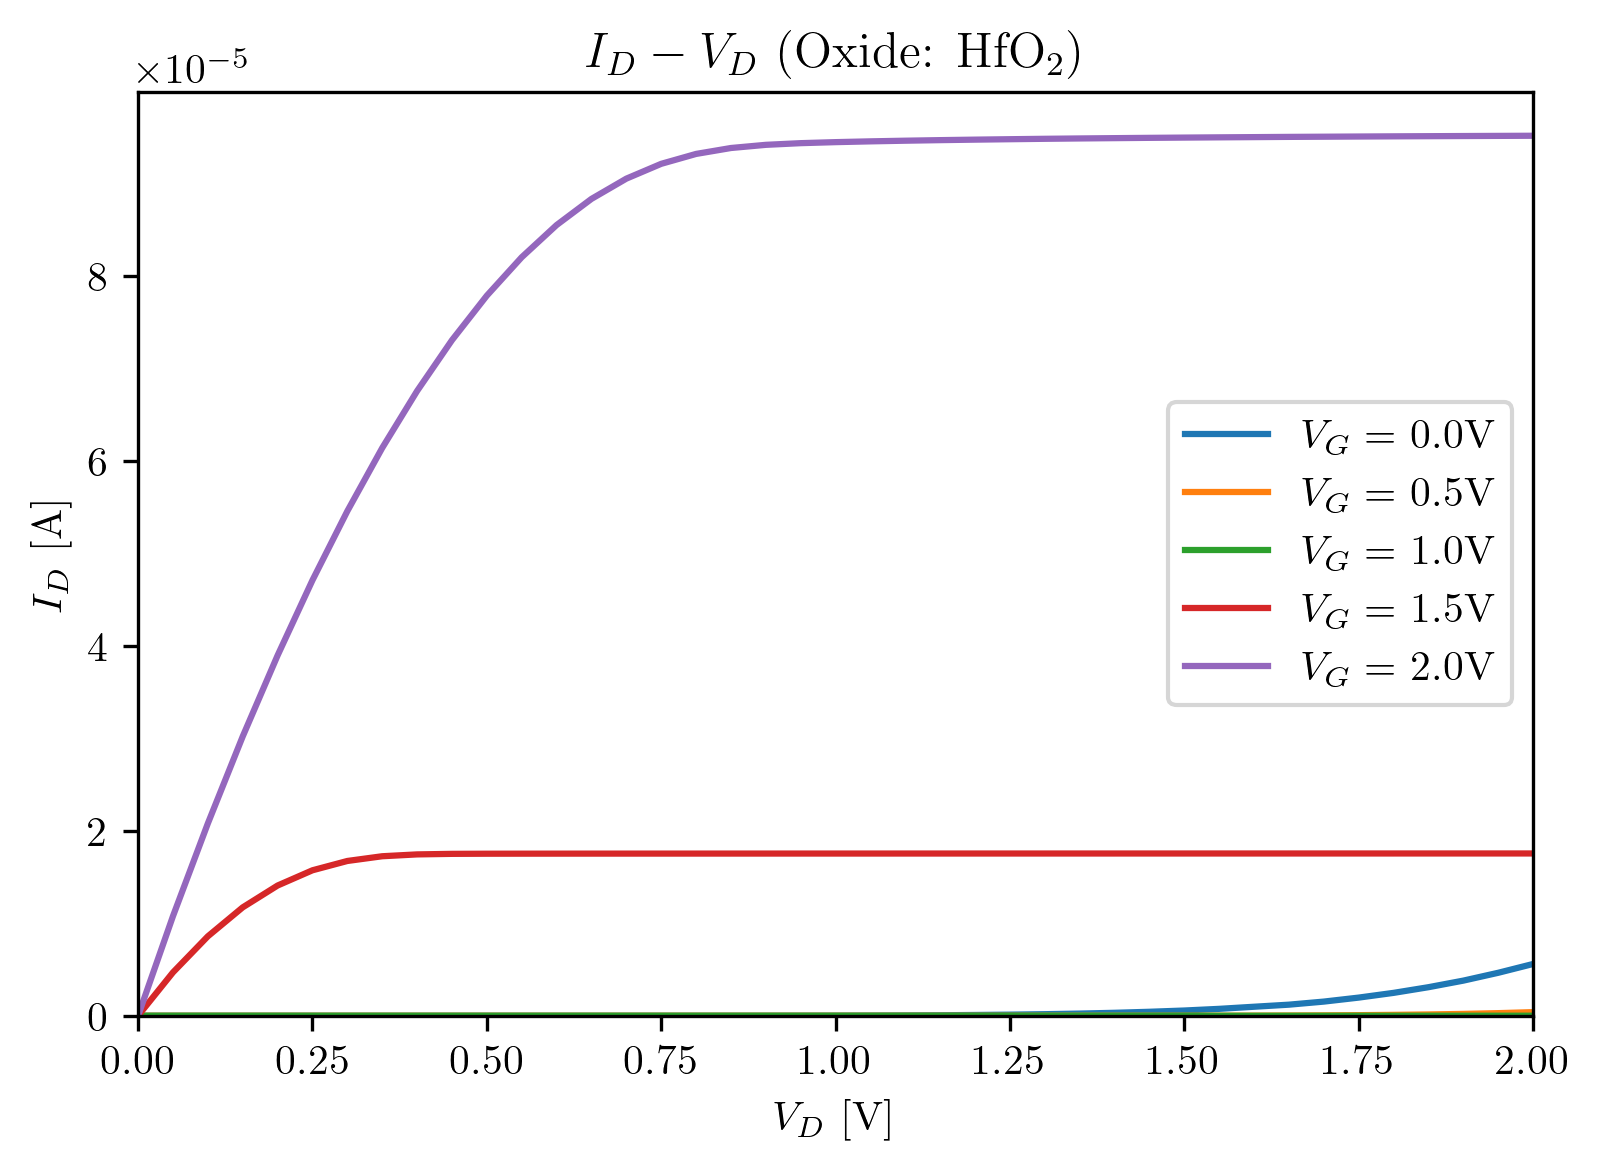

In [281]:
df = pd.read_csv('data/H1.TXT',skiprows=[0,1,2,4], sep = " |\t",engine='python')

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
graph2(ax,df,"VDS","ID","VG")

ax.invert_xaxis()
ax.legend()
ax.set_title(r"$I_D-V_D$ (Oxide: HfO$_2$)")
ax.set_xlabel(r"$V_D $ [V]")
ax.set_ylabel(r"$I_D $ [A]")
ax.set_ylim(bottom=0)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set_xlim(0,2)
plt.savefig("graphs/HfO2/Id_Vd_HfO2.png")

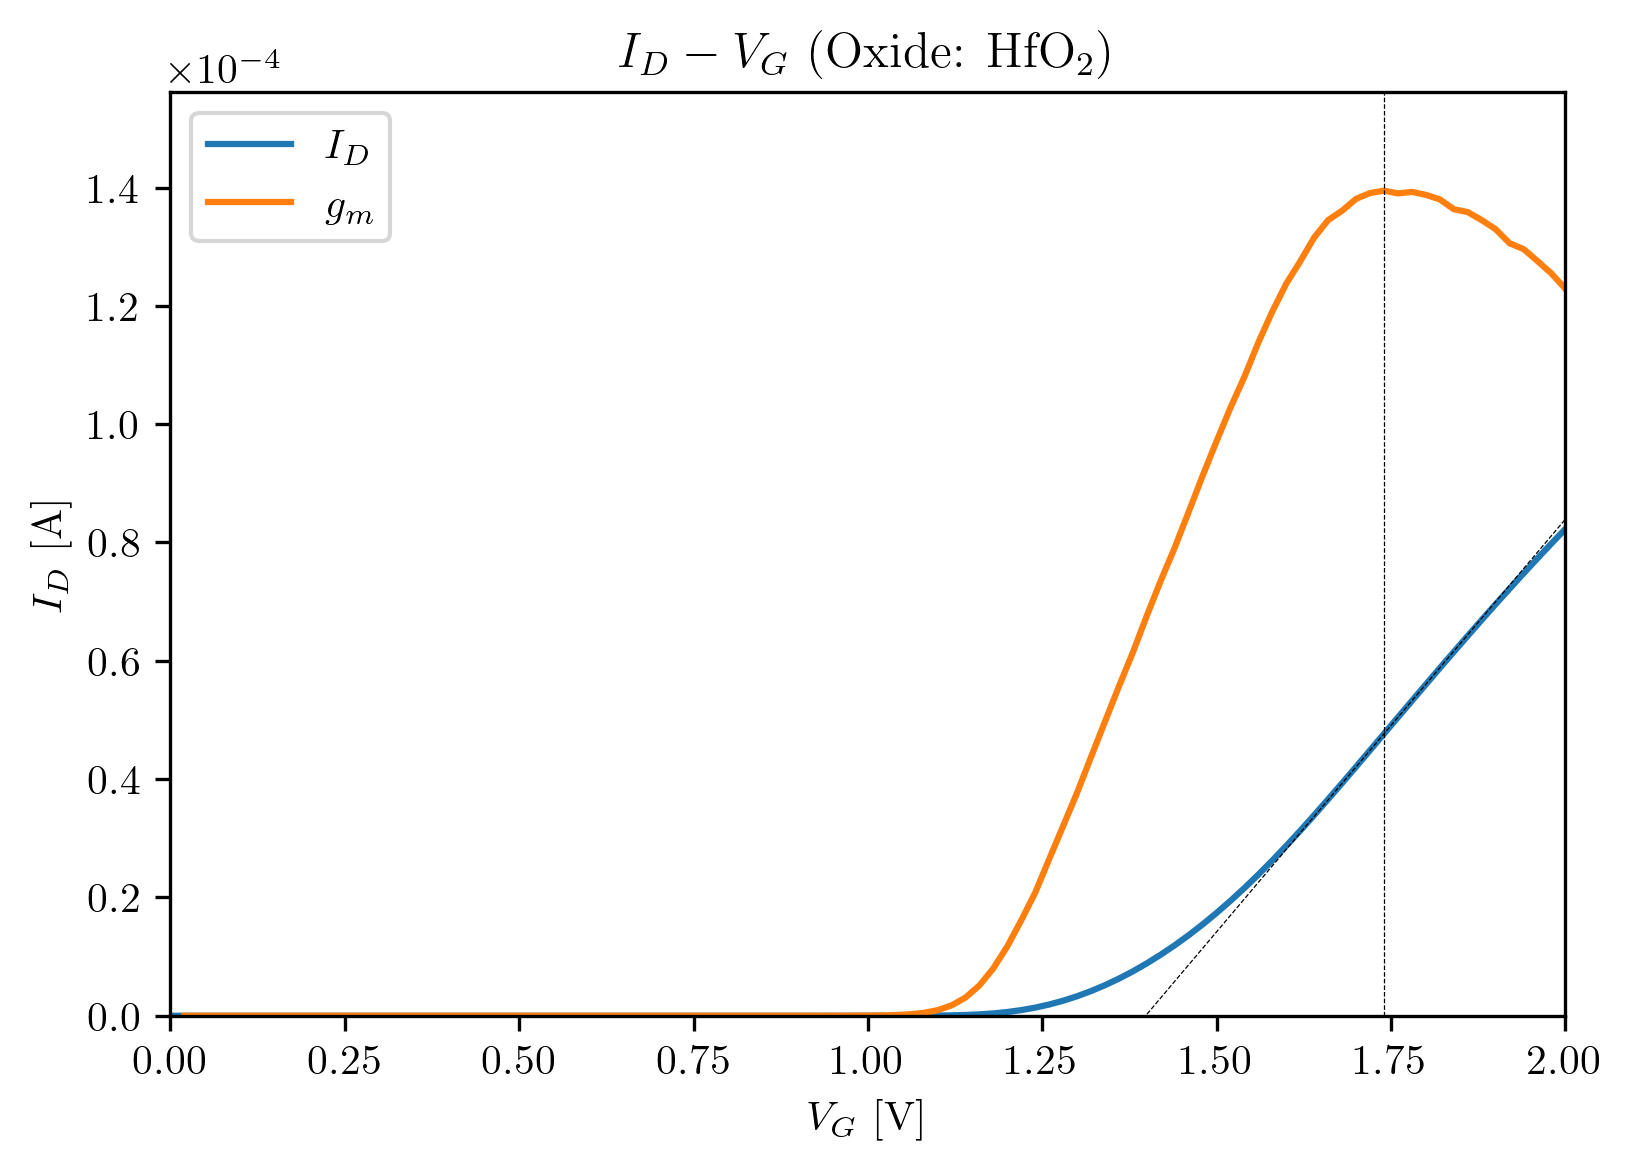

In [282]:
df = pd.read_csv('data/H2.TXT',skiprows=[0,1,2,4], sep = " |\t",engine='python')

#negative -> positive
df['ID'] = df['ID'].abs()
df['VG'] = df['VG'].abs()
df['VDS'] = df['VDS'].abs()

#cut data
df = df.loc[df['VDS'] == 0.5]
df = df[:int(len(df)/2)]
df.reset_index(inplace=True)

#derivative
df['dID'] = df['ID'].diff()
df['dVG'] = df['VG'].diff()
df['gm'] = df['dID']/df['dVG']

#tangent line
df['VDS_tan'] = df['gm'].max() * (df['VG'] - df['VG'][df['gm'].idxmax()]) + df['ID'][df['gm'].idxmax()]

#graph
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

ax.plot(df["VG"],df["ID"], label=r"$I_D$")
ax.plot(df["VG"],df["gm"], label=r"$g_m$")
ax.plot(df["VG"],df["VDS_tan"],linestyle='dashed',color='black',linewidth=0.3)
ax.axvline(x=df['VG'][df['gm'].idxmax()], ymin=0.0, ymax = 1.0, ls='dashed', c='Black', linewidth=0.3)

#style
ax.set_xlim(0.0,2.0)
ax.set_ylim(bottom=0)

ax.legend(loc='upper left')

ax.set_title(r"$I_D-V_G$ (Oxide: HfO$_2$)")
ax.set_xlabel(r"$V_G $ [V]")
ax.set_ylabel(r"$I_D$ [A]")

ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.savefig("graphs/HfO2/Id_Vg_HfO2.png")

Vt = 1.4


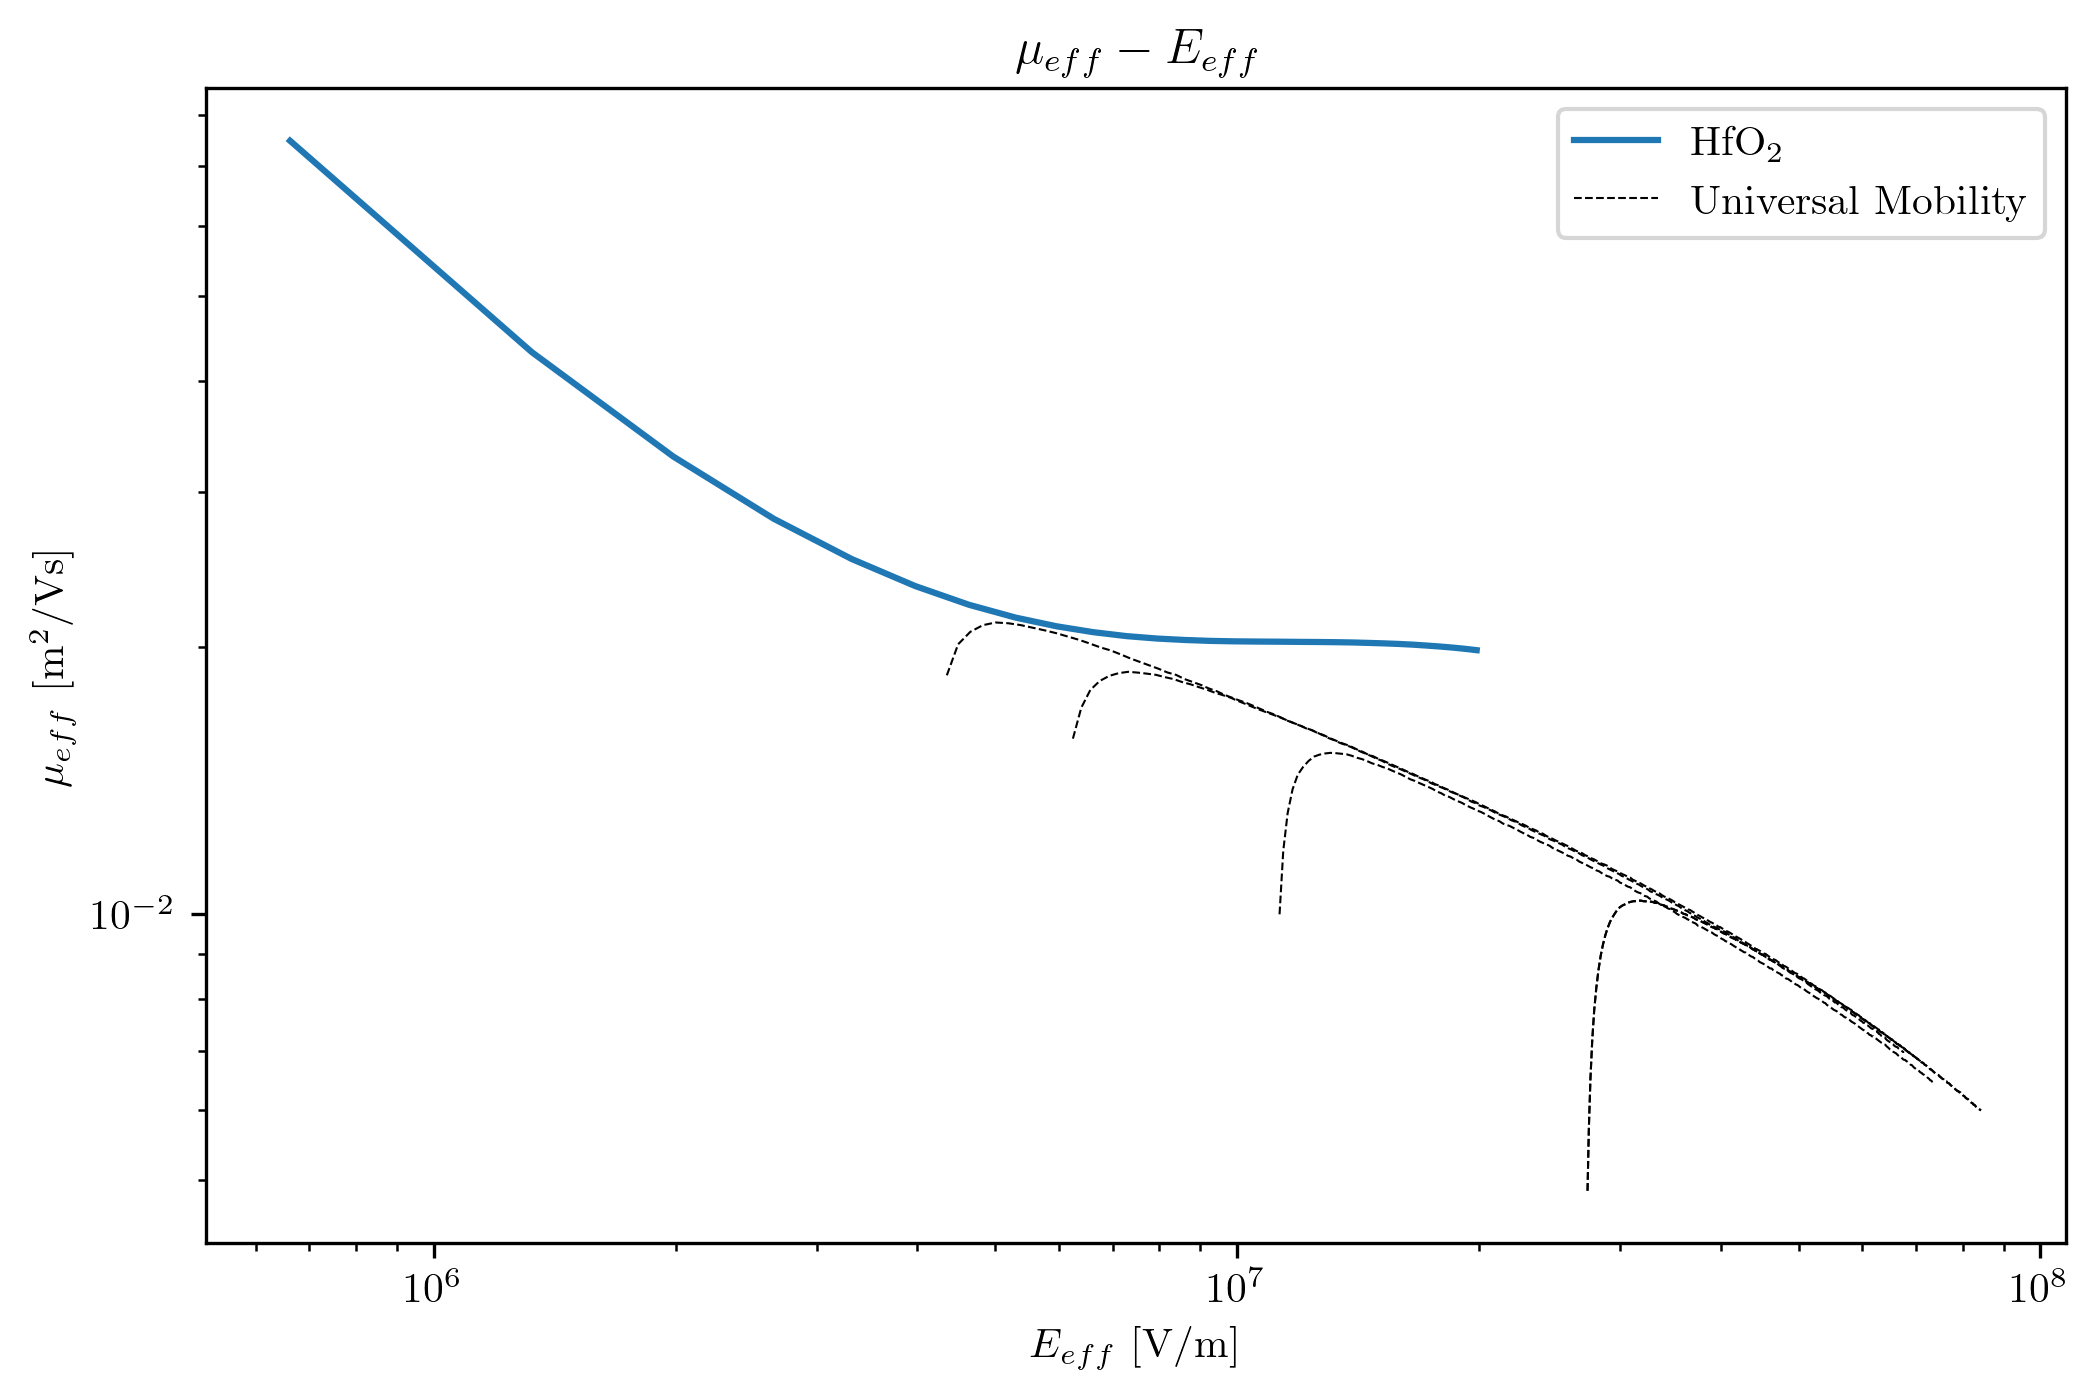

In [302]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
epsilon_si = 15.7*8.854e-12
Cox = 3.9*8.854e-12/2.5e-9
idvg_list = [2,3,6,9]

df = pd.read_csv('data/H2.TXT',skiprows=[0,1,2,4], sep = " |\t",engine='python')

W = 100e-6
L = 100*10**-6

#negative -> positive
df['ID'] = df['ID'].abs()
df['VG'] = df['VG'].abs()
df['VDS'] = df['VDS'].abs()

#cut data
df = df.loc[df['VDS'] == 0.5]
df = df[:int(len(df)/2)]
df.reset_index(inplace=True)

#derivative
df['dID'] = df['ID'].diff()
df['dVG'] = df['VG'].diff()
df['gm'] = df['dID']/df['dVG']

#tangent line
df['VDS_tan'] = df['gm'].max() * (df['VG'] - df['VG'][df['gm'].idxmax()]) + df['ID'][df['gm'].idxmax()]

#Get Vt
for j in range (0, len(df)):
    if(df['VDS_tan'][j] > 0.0):
        print ("Vt =",df['VG'][j])
        Vt = df['VG'][j]
        break

df['mu_eff'] = (L/W)*(1/(Cox*(df['VG']-Vt)))*(df['ID']/df['VDS'])

eta = 1/3
df['E_eff'] = ((eta*Cox)/epsilon_si)*(df['VG']-Vt)

ax.plot(df['E_eff'],df['mu_eff'],label=r"HfO$_2$")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$E_{eff}$ [V/m]")
ax.set_ylabel(r"$\mu_{eff}$ [m$^2$/Vs]")
ax.set_title(r"$\mu_{eff}-E_{eff}$")

sheets = ['2e16','8e15','5e16','3e17','7e17']

for i in range (0, len(sheets)-1):
    df_unmob = pd.read_excel('universal_mob/pMOSFET/universal_mobility.xlsx',sheet_name=sheets[i],skiprows=[0,1,3], names=['ns','eeff','mob'])
    ax.plot(df_unmob['eeff'],df_unmob['mob'],c="black",linewidth=0.5,linestyle="dashed")
i += 1
ax.plot(df_unmob['eeff'],df_unmob['mob'],c="black",linewidth=0.5,linestyle="dashed",label="Universal Mobility")

ax.legend()

plt.savefig("graphs/HfO2/mobility_Vd500m.png")


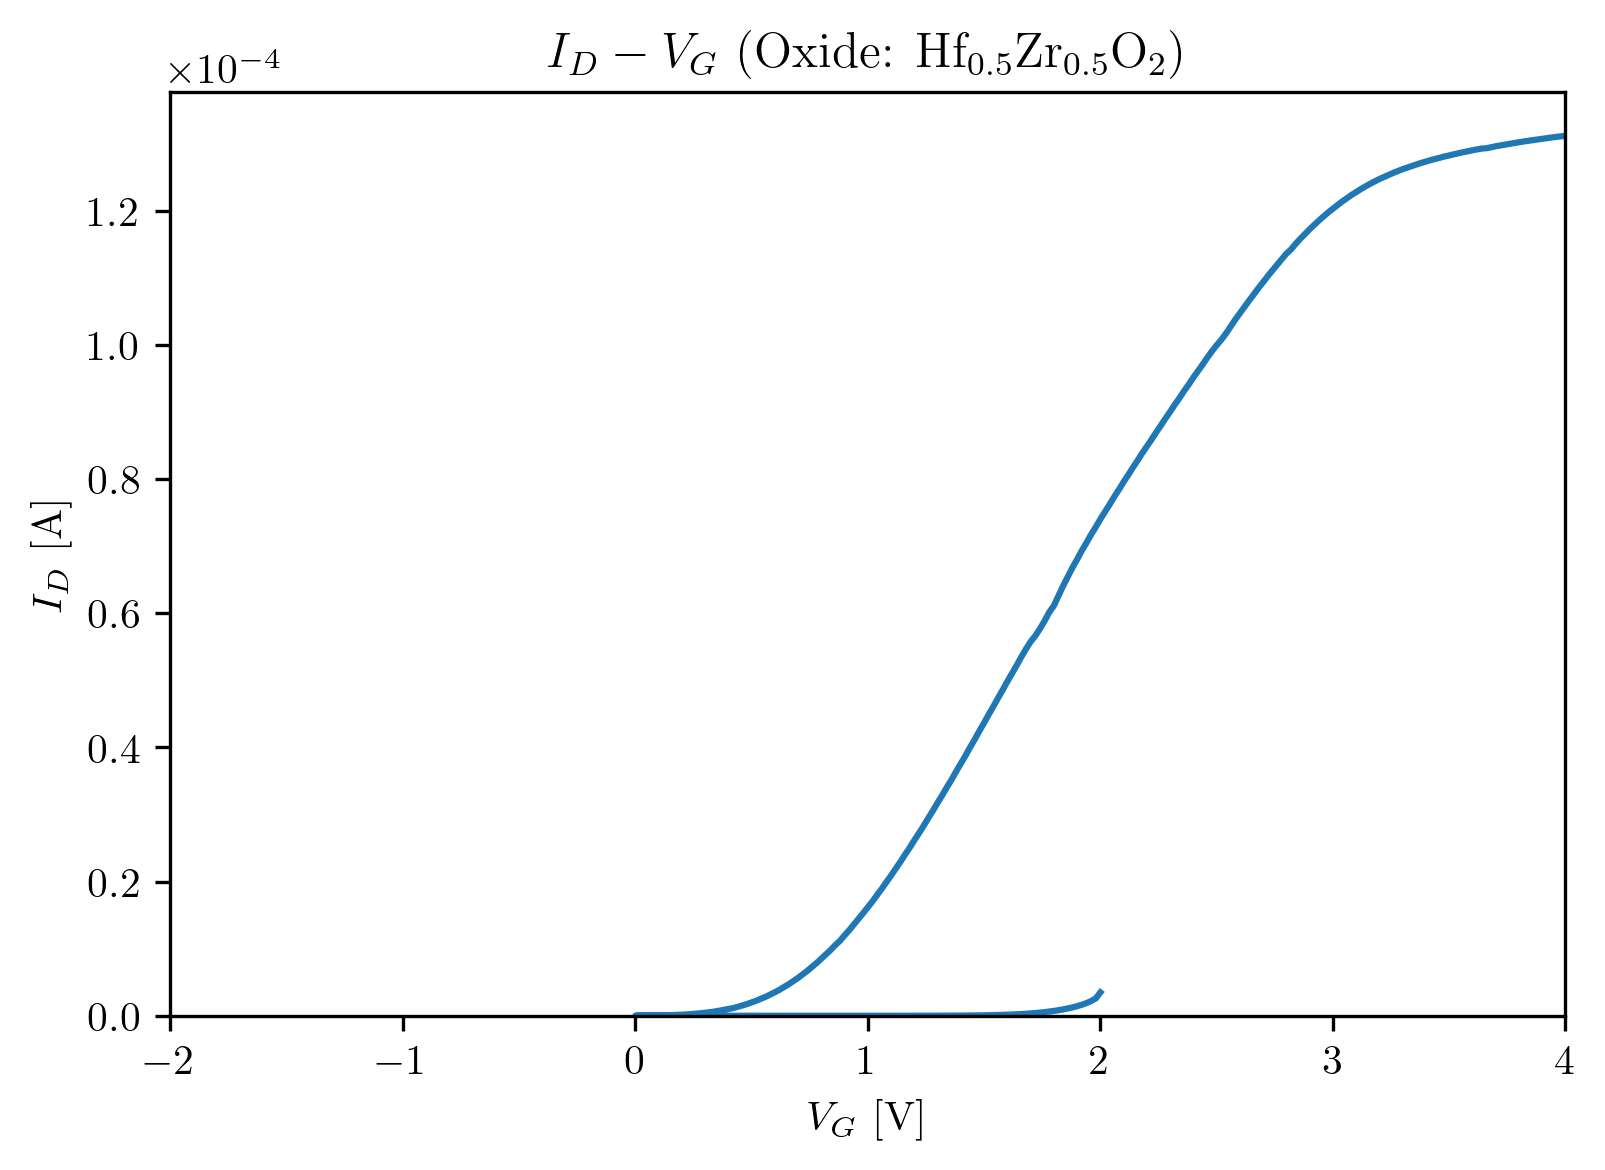

In [324]:
df = pd.read_csv('data/Z2.TXT',skiprows=[0,1,2,4], sep = " |\t",engine='python')

#negative -> positive
df['ID'] = df['ID'].abs()
df['VG'] = df['VG'].abs()
df['VDS'] = df['VDS'].abs()

#cut data
df = df.loc[df['VDS'] == 0.5]
df = df[:int(len(df)/2)]
df.reset_index(inplace=True)

#graph
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

ax.plot(df["VG"],df["ID"])

#style
ax.set_xlim(-2.0,4)
ax.set_ylim(bottom=0)

ax.set_title(r"$I_D-V_G$ (Oxide: Hf$_{0.5}$Zr$_{0.5}$O$_2$)")
ax.set_xlabel(r"$V_G $ [V]")
ax.set_ylabel(r"$I_D$ [A]")

ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.savefig("graphs/Hf05Zr05O2/Id_Vg_-2to4_Vd500m.png")

In [ ]:
df = pd.read_csv('data/Z2.TXT',skiprows=[0,1,2,4], sep = " |\t",engine='python')

#negative -> positive
df['ID'] = df['ID'].abs()
df['VG'] = df['VG'].abs()
df['VDS'] = df['VDS'].abs()

#cut data
df = df.loc[df['VDS'] == 0.5]
df = df[:int(len(df)/2)]
df.reset_index(inplace=True)

#derivative
df['dID'] = df['ID'].diff()
df['dVG'] = df['VG'].diff()
df['gm'] = df['dID']/df['dVG']

#tangent line
df['VDS_tan'] = df['gm'].max() * (df['VG'] - df['VG'][df['gm'].idxmax()]) + df['ID'][df['gm'].idxmax()]

#graph
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

ax.plot(df["VG"],df["ID"], label=r"$I_D$")
ax.plot(df["VG"],df["gm"], label=r"$g_m$")
ax.plot(df["VG"],df["VDS_tan"],linestyle='dashed',color='black',linewidth=0.3)
ax.axvline(x=df['VG'][df['gm'].idxmax()], ymin=0.0, ymax = 1.0, ls='dashed', c='Black', linewidth=0.3)

#style
ax.set_xlim(0.0,2.0)
ax.set_ylim(bottom=0)

ax.legend(loc='upper left')

ax.set_title(r"$I_D-V_G$ (Oxide: HfO$_2$)")
ax.set_xlabel(r"$V_G $ [V]")
ax.set_ylabel(r"$I_D$ [A]")

ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.savefig("graphs/HfO2/Id_Vg_HfO2.png")